# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


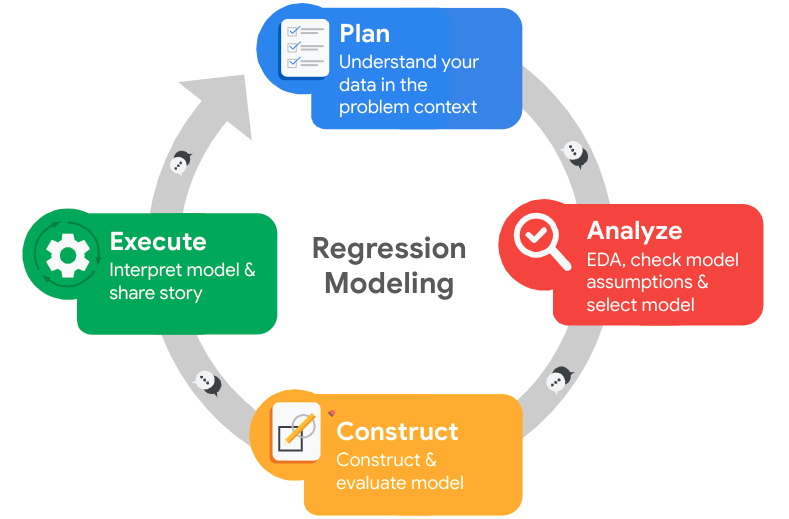

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [12]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 100)

### YOUR CODE HERE ### 

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [14]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [17]:
# Gather basic information about the data
df0.info()
### YOUR CODE HERE ###


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [19]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [22]:
# Display all column names
df0.columns
### YOUR CODE HERE ###


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [23]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns = {'average_montly_hours' : 'average_monthly_hours',
                     'Work_accident' : 'work_accident',
                     'Department' : 'department'}, inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [26]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [29]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [30]:
df0.loc[df0.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  time_spend_company  work_accident  left  \
396                      139                   3              0     1   
866                      128                   3              0     1   
1317                     127                   3              0     1   
1368                     132                   3              0     1   
1461                     142                   3              0     1   
...                      ...                 ...            ...   ...   
14994                    151                   3              0     1   
14995                    160                   3              0     1   
14996                    143                   3              0     1   
14997                    280                   4              0     1   
14998                    158                   3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [31]:
#There are no unique columns (IDs, Names, ect) that can be an anchor for duplicates investigation.
#Identifying how many unique values in continuous data might help us to picture how the data's taken

df0['satisfaction_level'].nunique()

92

In [32]:
df0['last_evaluation'].nunique()

65

In [33]:
'''

high unique number values proves that there are high amount of variation you can get 
and getting an exact score is mostly unlikely. not to mention getting both satisfaction_level and last_evaluation
the exact same score.
in other words the duplicates are most likely due to double input or system errors. 
'''

'\n\nhigh unique number values proves that there are high amount of variation you can get \nand getting an exact score is mostly unlikely. not to mention getting both satisfaction_level and last_evaluation\nthe exact same score.\nin other words the duplicates are most likely due to double input or system errors. \n'

In [34]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE###
'''
there is so many duplicated data (3008 data) which are 20% of our total entries. 

ideally if there are some unique columns like id or name, further investigation can be held regarding those duplicates
but since there are no clue to based on, and the low probability of duplicates occuring, i decided to drop those columns 
assuming those are errors

worth to note that the input error covers 20% of the data so further investigation and fixing can be planned
'''

'\nthere is so many duplicated data (3008 data) which are 20% of our total entries. \n\nideally if there are some unique columns like id or name, further investigation can be held regarding those duplicates\nbut since there are no clue to based on, and the low probability of duplicates occuring, i decided to drop those columns \nassuming those are errors\n\nworth to note that the input error covers 20% of the data so further investigation and fixing can be planned\n'

In [35]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates().copy()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [36]:
df.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

In [39]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
df.describe()
#the 75% percentile of [time_spend_company] are far from the max value meaning that there might be an outlier there. 

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours  time_spend_company  work_accident          left  \
count           11991.000000        11991.000000   11991.000000  11991.000000   
mean              200.473522            3.364857       0.154282      0.166041   
std                48.727813            1.330240       0.361234      0.372133   
min                96.000000            2.000000       0.000000      0.000000   
25%               157.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               243.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

<Axes: xlabel='time_spend_company'>

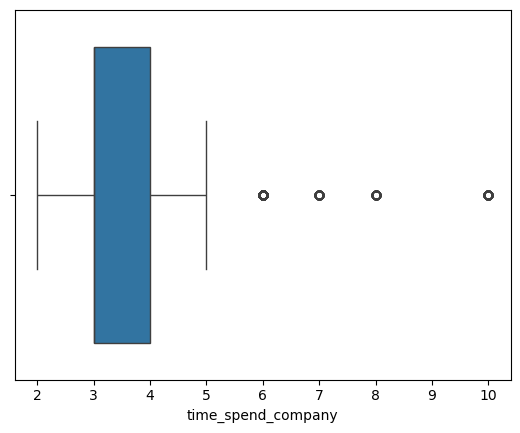

In [40]:
sns.boxplot(data = df, x = 'time_spend_company')

<Axes: xlabel='time_spend_company', ylabel='Count'>

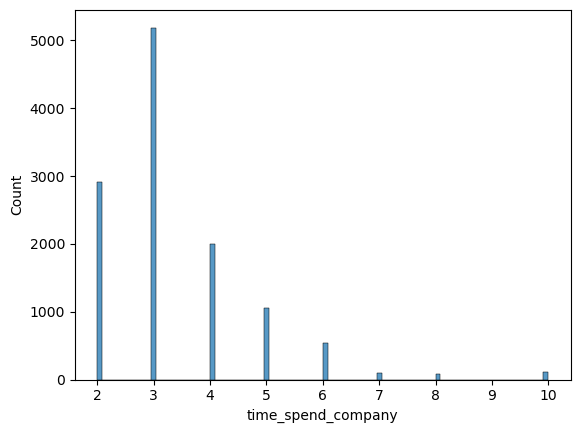

In [41]:
sns.histplot(df['time_spend_company'])

In [42]:
#Isolating data with 7++ years spent on this company
df['time_spend_company'].value_counts()
#7+ years have really low count compared to the other. so the next question is, 
#is there any difference between the 7+ group and the other group regarding other paremeters

time_spend_company
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [43]:
df.loc[df['time_spend_company'] >= 7]

satisfaction_level  last_evaluation  number_project  \
11007                0.49             0.67               2   
11008                0.92             0.99               3   
11009                0.81             0.55               4   
11010                0.62             0.91               3   
11011                0.21             0.70               3   
...                   ...              ...             ...   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   

       average_monthly_hours  time_spend_company  work_accident  left  \
11007                    190                   8              0     0   
11008                    176                   8              0     0   
11009                    217                   8              0     0   
11010                    269                   8              0     0   
11011                    238                   8              0     0   
...                      ...                 ...            ...   ...   
11994                    193                  10              0     0   
11995                    259                  10              1     0   
11996                    266                  10              0     0   
11997                    185                  10              0     0   
11998                    172                  10              0     0   

       promotion_last_5years  department  salary  
11007                      0   marketing  medium  
11008                      0       sales  medium  
11009                      0  accounting  medium  
11010                      0     support  medium  
11011                      0   technical  medium  
...                      ...         ...     ...  
11994                      1  management    high  
11995                      1  management    high  
11996                      1  management    high  
11997                      1  management    high  
11998                      1   marketing    high  

[282 rows x 10 columns]

In [44]:
df_years = df.copy()
df_years['year_group_7'] = np.where(df_years['time_spend_company'] >= 7, 1, 0)
df_years.head(10)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  year_group_7  
0     low             0  
1  medium             0  
2  medium             0  
3     low             0  
4     low             0  
5     low             0  
6     low             0  
7     low             0  
8     low             0  
9     low             0

In [45]:
df_years.groupby('year_group_7').describe()

satisfaction_level                                                \
                          count      mean       std   min     25%   50%   75%   
year_group_7                                                                    
0                       11709.0  0.629128  0.241415  0.09  0.4800  0.66  0.82   
1                         282.0  0.651667  0.225563  0.14  0.5025  0.66  0.85   

                  last_evaluation                                         \
              max           count      mean       std   min   25%    50%   
year_group_7                                                               
0             1.0         11709.0  0.716852  0.168510  0.36  0.57  0.720   
1             1.0           282.0  0.709645  0.161359  0.37  0.59  0.715   

                        number_project                                     \
               75%  max          count      mean       std  min  25%  50%   
year_group_7                                                                
0             0.86  1.0        11709.0  3.803741  1.167000  2.0  3.0  4.0   
1             0.85  1.0          282.0  3.765957  0.995637  2.0  3.0  4.0   

                       average_monthly_hours                                \
              75%  max                 count        mean        std    min   
year_group_7                                                                 
0             5.0  7.0               11709.0  200.528909  48.745397   96.0   
1             4.0  6.0                 282.0  198.173759  48.020847  100.0   

                                          time_spend_company            \
                25%    50%     75%    max              count      mean   
year_group_7                                                             
0             157.0  200.0  243.00  310.0            11709.0  3.242975   
1             156.0  199.5  238.75  286.0              282.0  8.425532   

                                                  work_accident            \
                   std  min  25%  50%   75%   max         count      mean   
year_group_7                                                                
0             1.067812  2.0  3.0  3.0   4.0   6.0       11709.0  0.152874   
1             1.294577  7.0  7.0  8.0  10.0  10.0         282.0  0.212766   

                                                    left                     \
                   std  min  25%  50%  75%  max    count     mean       std   
year_group_7                                                                  
0             0.359881  0.0  0.0  0.0  0.0  1.0  11709.0  0.17004  0.375684   
1             0.409991  0.0  0.0  0.0  0.0  1.0    282.0  0.00000  0.000000   

                                      promotion_last_5years            \
              min  25%  50%  75%  max                 count      mean   
year_group_7                                                            
0             0.0  0.0  0.0  0.0  1.0               11709.0  0.014690   
1             0.0  0.0  0.0  0.0  0.0                 282.0  0.109929   

                                                 
                   std  min  25%  50%  75%  max  
year_group_7                                     
0             0.120312  0.0  0.0  0.0  0.0  1.0  
1             0.313357  0.0  0.0  0.0  0.0  1.0

In [46]:
# 7++ time_spend_company are obviously not a miss entry data because we can clearly see that no one that belongs on that group
# has left the company. which means those people do exist and it's not a miss entry data
# promotion_last_5years vastly different than the below 7 year group. that means more people on 7+ group has received promotion 
# work_accident also shows significant difference between both group. more people are in above 7 year gorup has at some point involve in work_accident
#this means that there is a possibility that some of those men are protected by the company since the company 'indebted' by the worker


In [47]:
df_years.groupby('time_spend_company')['work_accident'].value_counts(normalize = True)

time_spend_company  work_accident
2                   0                0.828179
                    1                0.171821
3                   0                0.850289
                    1                0.149711
4                   0                0.862344
                    1                0.137656
5                   0                0.859699
                    1                0.140301
6                   0                0.837638
                    1                0.162362
7                   0                0.861702
                    1                0.138298
8                   0                0.728395
                    1                0.271605
10                  0                0.766355
                    1                0.233645
Name: proportion, dtype: float64

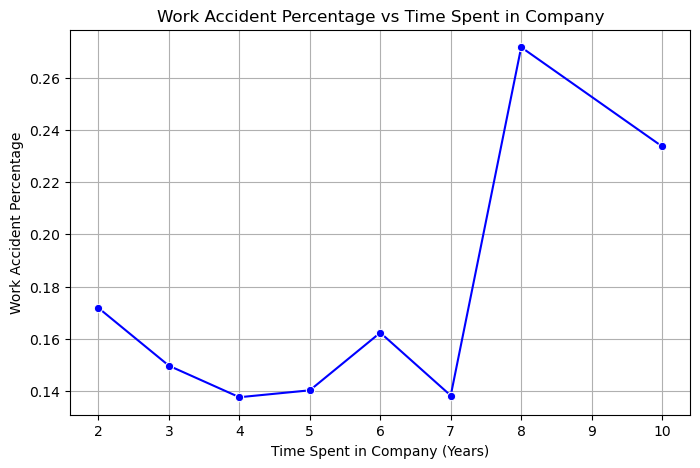

In [48]:
accident_percentage = df.groupby('time_spend_company')['work_accident'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x=accident_percentage['time_spend_company'], y=accident_percentage['work_accident'], marker='o', color='b')

plt.xlabel("Time Spent in Company (Years)")
plt.ylabel("Work Accident Percentage")
plt.title("Work Accident Percentage vs Time Spent in Company")
plt.grid(True)
plt.show()
#this shows that the work_accident percentage among those working longer spikes at 8 years of work. 
#this also doesnt justify the outliers though

In [49]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###



Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [55]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df['left'].value_counts(normalize = True))


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [58]:
# Create a plot as needed
### YOUR CODE HERE ###
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11991.000000     11991.000000    11991.000000   
mean             0.629658         0.716683        3.802852   
std              0.241070         0.168343        1.163238   
min              0.090000         0.360000        2.000000   
25%              0.480000         0.570000        3.000000   
50%              0.660000         0.720000        4.000000   
75%              0.820000         0.860000        5.000000   
max              1.000000         1.000000        7.000000   

       average_monthly_hours  time_spend_company  work_accident          left  \
count           11991.000000        11991.000000   11991.000000  11991.000000   
mean              200.473522            3.364857       0.154282      0.166041   
std                48.727813            1.330240       0.361234      0.372133   
min                96.000000            2.000000       0.000000      0.000000   
25%               157.000000            3.000000       0.000000      0.000000   
50%               200.000000            3.000000       0.000000      0.000000   
75%               243.000000            4.000000       0.000000      0.000000   
max               310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11991.000000  
mean                0.016929  
std                 0.129012  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [59]:
# Create a plot as needed
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

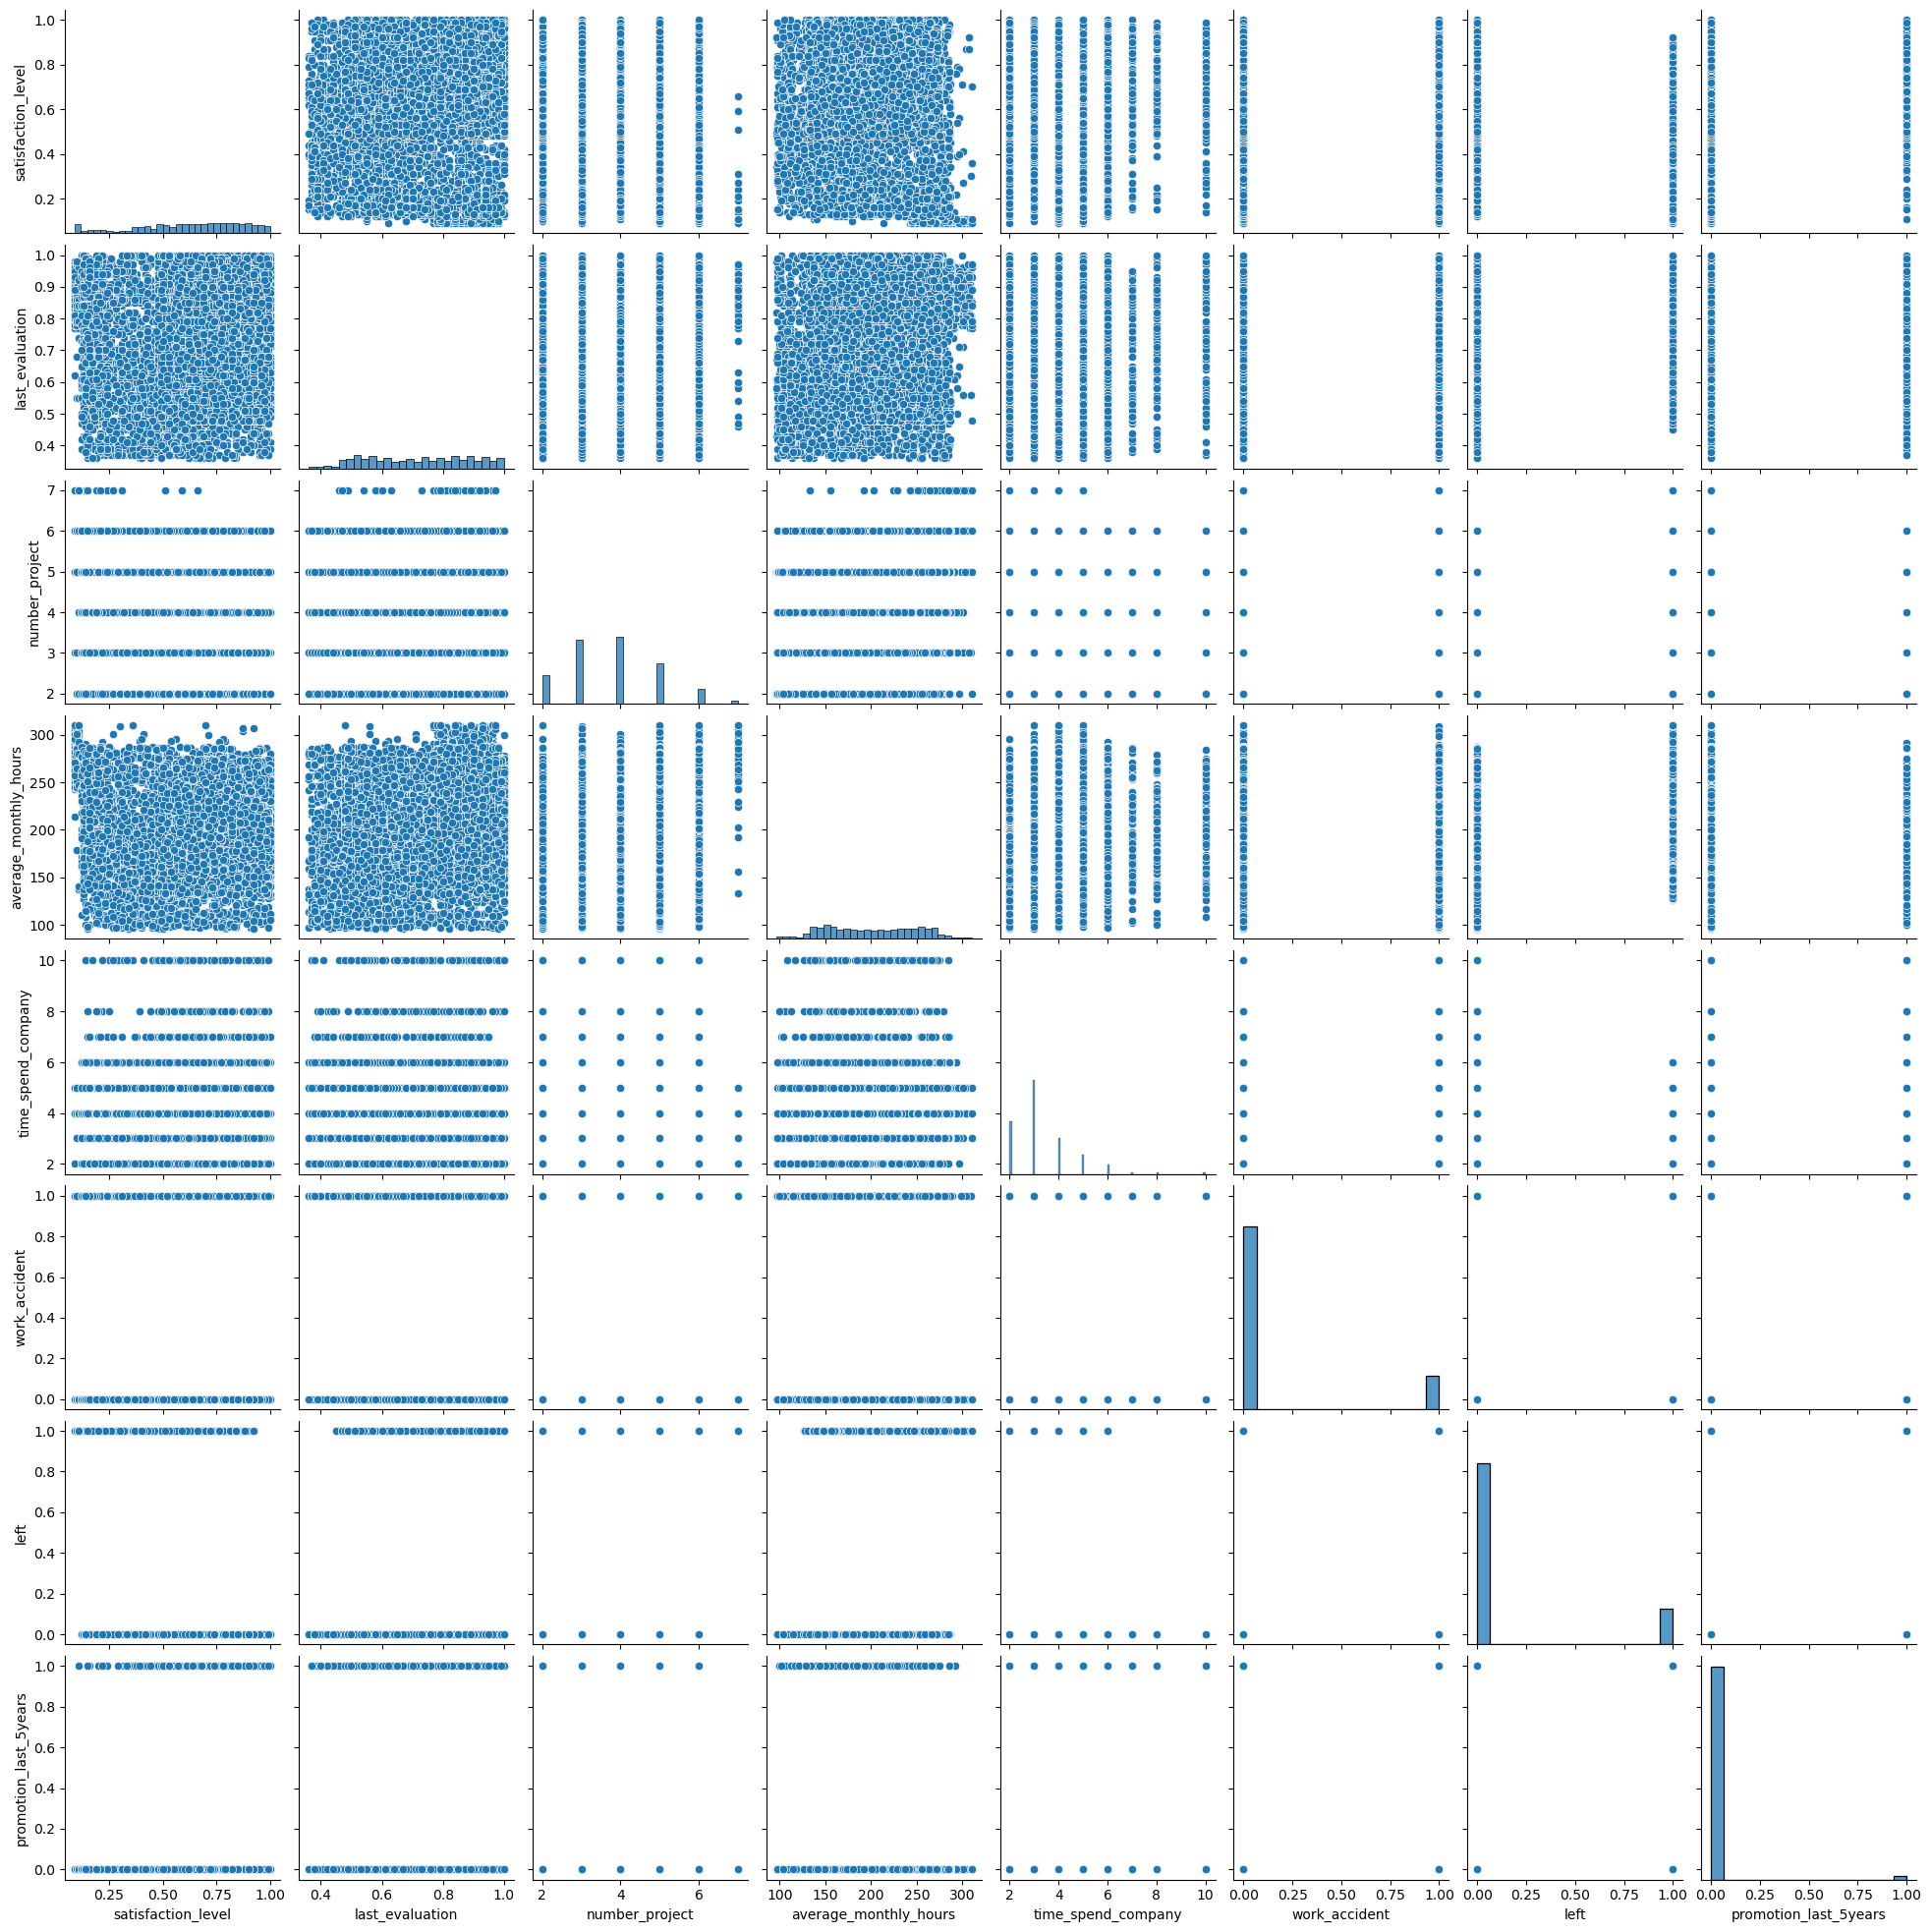

In [60]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df)

In [61]:
# Create a plot as needed
### YOUR CODE HERE ###
df.groupby('left').describe()


#INSIGHTS
#* [satisfaction_level] mean of people who's left and not left are vastly different
#    > Indicates that mostly employees who left are employees that are not satisfied
#* [promotion_last_5years] have a big difference, cosnidering the [time_spend_company] for the people who left are higher
#    > Indicates that they didn't receive promotion. thats why they left
#* [average_monthly_hours] for the people who left are higher than the one who didn't left. 
#  The problem is that the people who left works more than 200 hours a month  
#  (200 is the magic number since assuming 1 month have 25 work days, 200 is the exact number for working 8 hours a day)
#    > they work about 8 hours 19 more minutes a day 
#
#WORTH TO INVESTIGATE
# ['number_project'] std are significantly higher (almost doubles)
# 


satisfaction_level                                                    \
                  count      mean       std   min   25%   50%   75%   max   
left                                                                        
0               10000.0  0.667365  0.217082  0.12  0.54  0.69  0.84  1.00   
1                1991.0  0.440271  0.265207  0.09  0.11  0.41  0.73  0.92   

     last_evaluation                                                   \
               count      mean       std   min   25%   50%   75%  max   
left                                                                    
0            10000.0  0.715667  0.161919  0.36  0.58  0.71  0.85  1.0   
1             1991.0  0.721783  0.197436  0.45  0.52  0.79  0.91  1.0   

     number_project                                               \
              count      mean       std  min  25%  50%  75%  max   
left                                                               
0           10000.0  3.786800  0.981755  2.0  3.0  4.0  4.0  6.0   
1            1991.0  3.883476  1.817139  2.0  2.0  4.0  6.0  7.0   

     average_monthly_hours                                                    \
                     count       mean        std    min    25%    50%    75%   
left                                                                           
0                  10000.0  198.94270  45.665507   96.0  162.0  198.0  238.0   
1                   1991.0  208.16223  61.295145  126.0  146.0  226.0  262.5   

            time_spend_company                                                \
        max              count      mean       std  min  25%  50%  75%   max   
left                                                                           
0     287.0            10000.0  3.262000  1.367239  2.0  2.0  3.0  4.0  10.0   
1     310.0             1991.0  3.881467  0.974041  2.0  3.0  4.0  5.0   6.0   

     work_accident                                               \
             count      mean       std  min  25%  50%  75%  max   
left                                                              
0          10000.0  0.174500  0.379558  0.0  0.0  0.0  0.0  1.0   
1           1991.0  0.052737  0.223565  0.0  0.0  0.0  0.0  1.0   

     promotion_last_5years                                               
                     count      mean       std  min  25%  50%  75%  max  
left                                                                     
0                  10000.0  0.019500  0.138281  0.0  0.0  0.0  0.0  1.0  
1                   1991.0  0.004018  0.063277  0.0  0.0  0.0  0.0  1.0

In [62]:
df.corr(numeric_only = True)

#* The most correlated parameter with [left] is [satisfaction_level], [time_spend_company], and [work_accident]
#* even though correlated, the correlation shows that there are no strong relationship between 
#  those parameters and whether the person left or not
#* There are no other correlating parameter. 


satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.095186       -0.133246   
last_evaluation                  0.095186         1.000000        0.270256   
number_project                  -0.133246         0.270256        1.000000   
average_monthly_hours           -0.006252         0.264678        0.331516   
time_spend_company              -0.152915         0.096829        0.188837   
work_accident                    0.039940        -0.005695       -0.005612   
left                            -0.350558         0.013520        0.030928   
promotion_last_5years            0.019789        -0.007206       -0.000544   

                       average_monthly_hours  time_spend_company  \
satisfaction_level                 -0.006252           -0.152915   
last_evaluation                     0.264678            0.096829   
number_project                      0.331516            0.188837   
average_monthly_hours               1.000000            0.102875   
time_spend_company                  0.102875            1.000000   
work_accident                      -0.012860            0.000003   
left                                0.070409            0.173295   
promotion_last_5years              -0.004964            0.056828   

                       work_accident      left  promotion_last_5years  
satisfaction_level          0.039940 -0.350558               0.019789  
last_evaluation            -0.005695  0.013520              -0.007206  
number_project             -0.005612  0.030928              -0.000544  
average_monthly_hours      -0.012860  0.070409              -0.004964  
time_spend_company          0.000003  0.173295               0.056828  
work_accident               1.000000 -0.125436               0.029852  
left                       -0.125436  1.000000              -0.044657  
promotion_last_5years       0.029852 -0.044657               1.000000

In [63]:
df.groupby('department').size().sort_values(ascending = False)

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
dtype: int64

In [64]:
df.groupby('left')['department'].value_counts()

left  department 
0     sales          2689
      technical      1854
      support        1509
      IT              818
      RandD           609
      product_mng     576
      marketing       561
      accounting      512
      hr              488
      management      384
1     sales           550
      technical       390
      support         312
      IT              158
      hr              113
      marketing       112
      product_mng     110
      accounting      109
      RandD            85
      management       52
Name: count, dtype: int64

In [65]:
#df.info()
#df.groupby(['left', 'department']).size()/df.groupby(['left', 'department']).size().sum()
pd.crosstab(df['department'], df['left'], normalize = 'index')

#there are no significantly different proportion that shows an indication of miss management on a specific department in general
#while this might seems good, for some department i dont think its good. for example : sales department usually have higher turnover
#than other department which in this case is good because they dont have much difference. At the same time, management who shouldn't 
#have high turnover have unexpectedly higher turnover than sales. this should be noted


left                0         1
department                     
IT           0.838115  0.161885
RandD        0.877522  0.122478
accounting   0.824477  0.175523
hr           0.811980  0.188020
management   0.880734  0.119266
marketing    0.833581  0.166419
product_mng  0.839650  0.160350
sales        0.830195  0.169805
support      0.828666  0.171334
technical    0.826203  0.173797

<Axes: xlabel='left', ylabel='satisfaction_level'>

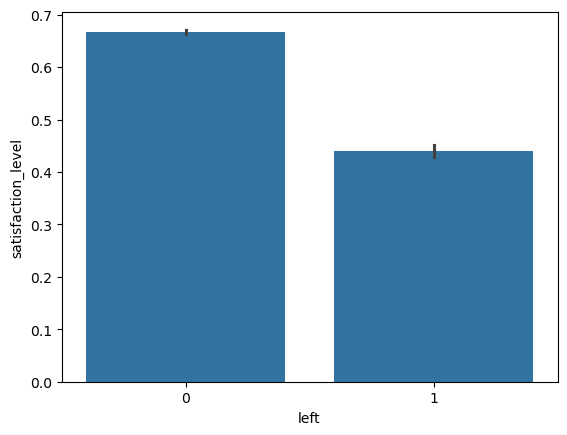

In [66]:
# Create a plot as needed
### YOUR CODE HERE ###

#SATISFACTION_LEVEL TROUBLESHOOTING
sns.barplot(data = df, x = 'left', y = 'satisfaction_level')


<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

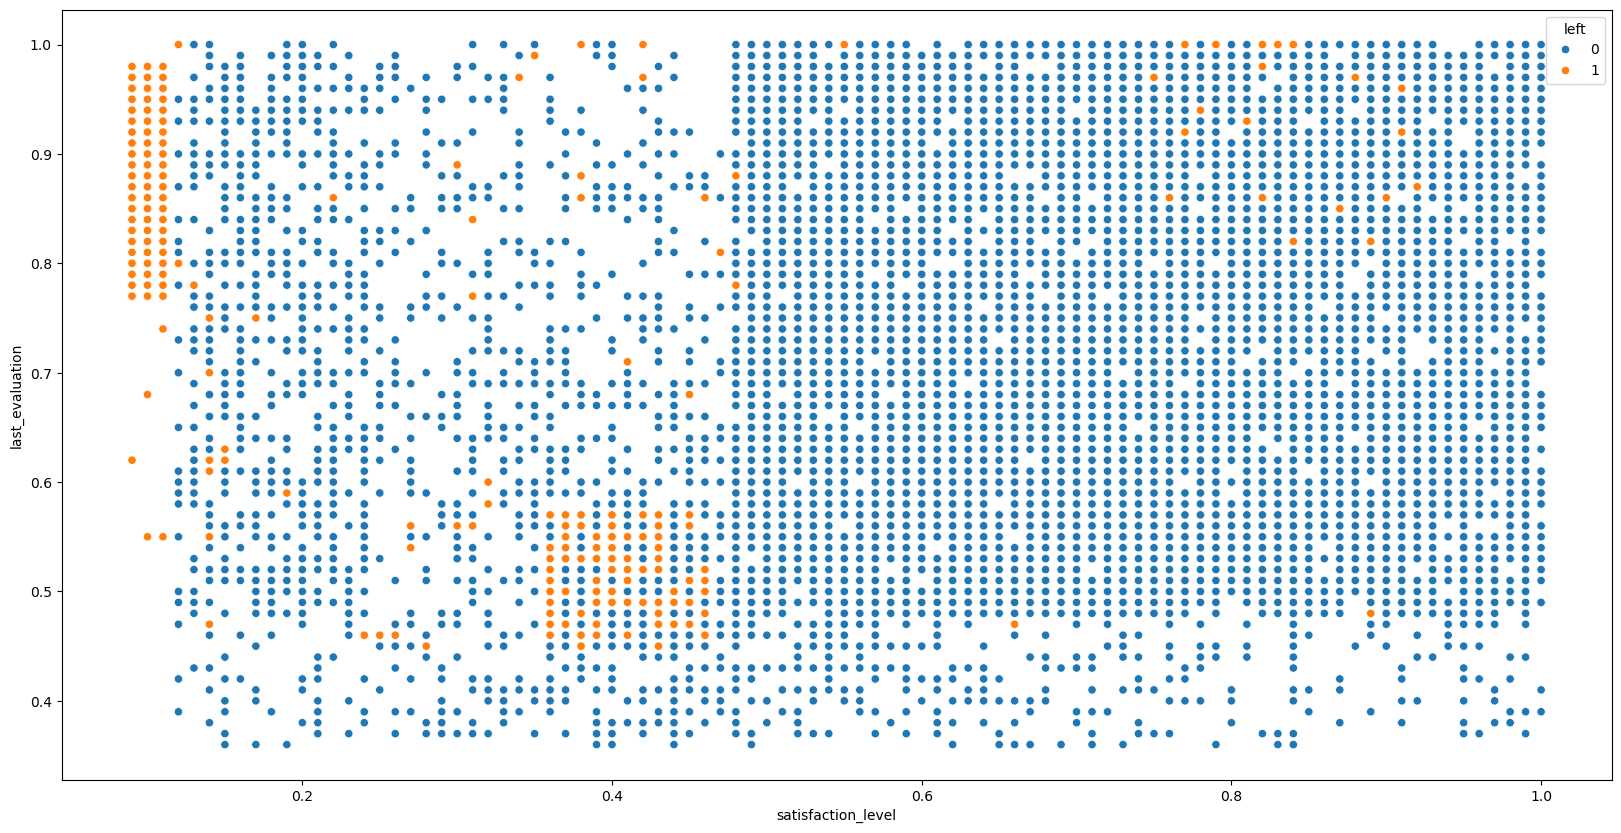

In [67]:
#Does peeople who had good capability (high[last_evaluation]) satisfied at their job (high [satisfaction_level])?
plt.figure(figsize = (20, 10))
sns.scatterplot(data = df, x = 'satisfaction_level', y = 'last_evaluation', hue = 'left')



* Interestingly there are groups where people with low [satisfaction_level] and high [last_evaluation] are forming
  a group (group 1)
  
* next group are people who left are gathered in 0.4 [satisfaction_level] with low [last_evaluation] (group 2)

> There are possibility that some of the people who have a good performance doesn't get enough appreciation
  Further investigation needed whether those group belongs to a specific category or what


In [69]:
#Does those trends applies in a specific department?
df.loc[(df['satisfaction_level']<0.1) & (df['left'] == 1)].head(30)


satisfaction_level  last_evaluation  number_project  \
22                 0.09             0.95               6   
30                 0.09             0.62               6   
44                 0.09             0.89               6   
71                 0.09             0.77               5   
73                 0.09             0.87               7   
94                 0.09             0.83               6   
103                0.09             0.94               7   
111                0.09             0.85               6   
128                0.09             0.82               6   
140                0.09             0.96               6   
186                0.09             0.85               6   
190                0.09             0.80               7   
193                0.09             0.82               6   
195                0.09             0.80               6   
273                0.09             0.96               6   
278                0.09             0.78               6   
332                0.09             0.98               6   
340                0.09             0.89               7   
350                0.09             0.80               6   
359                0.09             0.91               6   
397                0.09             0.79               6   
407                0.09             0.94               6   
420                0.09             0.96               6   
445                0.09             0.94               6   
454                0.09             0.97               7   
467                0.09             0.95               6   
477                0.09             0.79               6   
512                0.09             0.96               6   
517                0.09             0.86               7   
527                0.09             0.90               7   

     average_monthly_hours  time_spend_company  work_accident  left  \
22                     304                   4              0     1   
30                     294                   4              0     1   
44                     276                   4              0     1   
71                     275                   4              0     1   
73                     295                   4              0     1   
94                     255                   4              0     1   
103                    267                   4              0     1   
111                    289                   4              0     1   
128                    250                   4              0     1   
140                    245                   4              0     1   
186                    297                   4              0     1   
190                    283                   5              0     1   
193                    249                   4              0     1   
195                    304                   4              0     1   
273                    296                   4              0     1   
278                    254                   4              0     1   
332                    271                   4              0     1   
340                    308                   5              0     1   
350                    304                   5              0     1   
359                    275                   4              0     1   
397                    293                   5              0     1   
407                    257                   4              0     1   
420                    268                   4              0     1   
445                    283                   5              0     1   
454                    254                   4              1     1   
467                    292                   4              0     1   
477                    275                   4              0     1   
512                    259                   4              0     1   
517                    309                   4              0     1   
527           

In [70]:
df.loc[(df['satisfaction_level']<0.1) & (df['left'] == 1)].describe()
# Really high [number_project]
# Really high [average_monthly_hours]
# 0 [promotion_last_5years]

satisfaction_level  last_evaluation  number_project  \
count        1.100000e+02       110.000000      110.000000   
mean         9.000000e-02         0.871545        6.209091   
std          9.758911e-17         0.067528        0.591925   
min          9.000000e-02         0.620000        3.000000   
25%          9.000000e-02         0.820000        6.000000   
50%          9.000000e-02         0.870000        6.000000   
75%          9.000000e-02         0.930000        7.000000   
max          9.000000e-02         0.980000        7.000000   

       average_monthly_hours  time_spend_company  work_accident   left  \
count             110.000000          110.000000     110.000000  110.0   
mean              274.563636            4.100000       0.018182    1.0   
std                20.687951            0.381931       0.134220    0.0   
min               214.000000            2.000000       0.000000    1.0   
25%               257.250000            4.000000       0.000000    1.0   
50%               274.500000            4.000000       0.000000    1.0   
75%               292.750000            4.000000       0.000000    1.0   
max               310.000000            5.000000       1.000000    1.0   

       promotion_last_5years  
count                  110.0  
mean                     0.0  
std                      0.0  
min                      0.0  
25%                      0.0  
50%                      0.0  
75%                      0.0  
max                      0.0

In [71]:
df.loc[(df['satisfaction_level']<0.115) & (df['left'] == 1)].groupby('department').size().sort_values(ascending = False)


department
sales          125
technical      113
support         78
IT              46
accounting      30
hr              26
RandD           24
product_mng     23
marketing       22
management      14
dtype: int64

In [72]:
(df.loc[(df['satisfaction_level']<0.115) & (df['left'] == 1)].groupby('department').size() / df[df['left'] == 1].groupby('department').size()).sort_values(ascending = False)


department
IT             0.291139
technical      0.289744
RandD          0.282353
accounting     0.275229
management     0.269231
support        0.250000
hr             0.230088
sales          0.227273
product_mng    0.209091
marketing      0.196429
dtype: float64

In [73]:
np.mean(df.loc[(df['satisfaction_level']<0.115) & (df['left'] == 1)].groupby('department').size() / df[df['left'] == 1].groupby('department').size())


0.25205766018227527

In [74]:
df.loc[(df['satisfaction_level']<0.115) & (df['left'] == 1)].groupby('salary').size()


salary
high       10
low       292
medium    199
dtype: int64

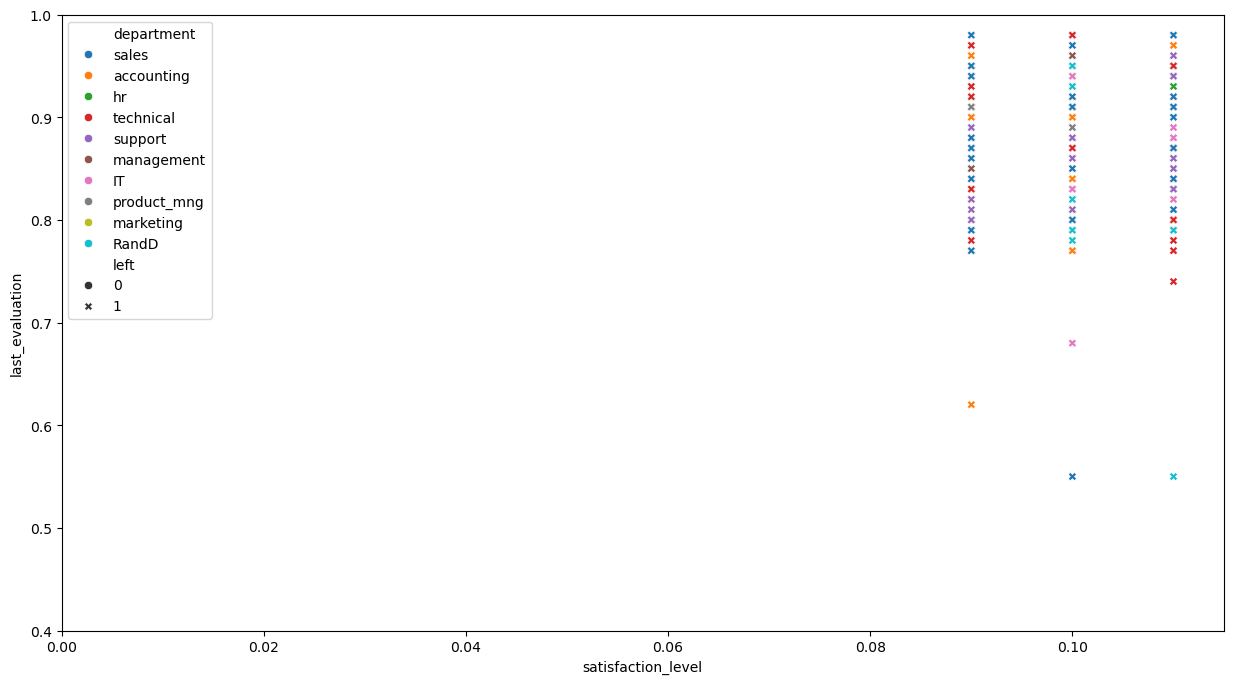

In [75]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df, x = 'satisfaction_level', y = 'last_evaluation', hue = 'department', style = 'left')
plt.xlim(0, 0.115)  
plt.ylim(0.4, 1.0)
plt.show()


* Worth to note that most of the left employee belongs to this group are tied to a high skilled department (IT, RND, Technical, and accounting)
  
* there are possibility that these people are incredibly exceptional at doing their job but doesnt get enough appreciation

* its worth to consider giving a raise or other incentive for employee that have 0.75 or more [last_evaluation] score with this we hope that employee with high skill have better satisfaction level

* we can also note that satisfaction level below 0.125 always results on employee leaving the company

* The closest thing we can get regarding these incident is

    > these high performance employee are getting overworked (working 274.56 hours a month in average or nearly 11 hour per day)

    > dominated by low and medium salary employee
    
    > almost doubles the amount of project (mean = 6.2 projects)

    > Absolutely no promotion among these group. 

In [77]:
#FOR  THE SECOND GROUP

df.loc[
    ((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    ((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 1)
].head(30)

satisfaction_level  last_evaluation  number_project  \
0                 0.38             0.53               2   
4                 0.37             0.52               2   
5                 0.41             0.50               2   
9                 0.42             0.53               2   
10                0.45             0.54               2   
13                0.41             0.55               2   
14                0.36             0.56               2   
15                0.38             0.54               2   
16                0.45             0.47               2   
18                0.45             0.51               2   
21                0.38             0.55               2   
23                0.46             0.57               2   
24                0.40             0.53               2   
27                0.40             0.49               2   
28                0.41             0.46               2   
29                0.38             0.50               2   
31                0.45             0.57               2   
32                0.40             0.51               2   
33                0.45             0.55               2   
36                0.38             0.46               2   
37                0.45             0.50               2   
39                0.41             0.54               2   
41                0.45             0.48               2   
42                0.40             0.46               2   
46                0.40             0.55               2   
48                0.40             0.54               2   
49                0.43             0.47               2   
51                0.44             0.55               2   
52                0.38             0.55               2   
53                0.39             0.54               2   

    average_monthly_hours  time_spend_company  work_accident  left  \
0                     157                   3              0     1   
4                     159                   3              0     1   
5                     153                   3              0     1   
9                     142                   3              0     1   
10                    135                   3              0     1   
13                    148                   3              0     1   
14                    137                   3              0     1   
15                    143                   3              0     1   
16                    160                   3              0     1   
18                    160                   3              1     1   
21                    147                   3              0     1   
23                    139                   3              0     1   
24                    158                   3              0     1   
27                    135                   3              0     1   
28                    128                   3              0     1   
29                    132                   3              0     1   
31                    134                   3              0     1   
32                    145                   3              0     1   
33                    140                   3              0     1   
36                    137                   3              0     1   
37                    126                   3              0     1   
39                    152                   3              0     1   
41                    158                   3              0     1   
42                    127                   3              0     1   
46                    147                   3              0     1   
48                    148                   3              0     1   
49                    147                   3              0     1   
51                    135                   3              0     1   
52                    134                   3              0     1   
53                    132                   3              0     1   

   

In [78]:
df.loc[
    ((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    ((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 1)
].describe()

satisfaction_level  last_evaluation  number_project  \
count          841.000000       841.000000      841.000000   
mean             0.408157         0.510785        2.028537   
std              0.030528         0.036307        0.274545   
min              0.310000         0.450000        2.000000   
25%              0.380000         0.480000        2.000000   
50%              0.410000         0.510000        2.000000   
75%              0.430000         0.540000        2.000000   
max              0.480000         0.580000        6.000000   

       average_monthly_hours  time_spend_company  work_accident   left  \
count             841.000000          841.000000     841.000000  841.0   
mean              144.701546            3.009512       0.052319    1.0   
std                15.508910            0.146075       0.222801    0.0   
min               126.000000            2.000000       0.000000    1.0   
25%               135.000000            3.000000       0.000000    1.0   
50%               144.000000            3.000000       0.000000    1.0   
75%               153.000000            3.000000       0.000000    1.0   
max               310.000000            5.000000       1.000000    1.0   

       promotion_last_5years  
count             841.000000  
mean                0.005945  
std                 0.076922  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [79]:
df.loc[(df['satisfaction_level'] < 0.5) & (df['last_evaluation'] < 0.6) & (df['left'] == 0)].describe()

satisfaction_level  last_evaluation  number_project  \
count          637.000000       637.000000      637.000000   
mean             0.333391         0.489686        3.838305   
std              0.117470         0.066445        1.282652   
min              0.120000         0.360000        2.000000   
25%              0.220000         0.430000        3.000000   
50%              0.350000         0.500000        4.000000   
75%              0.440000         0.550000        5.000000   
max              0.490000         0.590000        6.000000   

       average_monthly_hours  time_spend_company  work_accident   left  \
count             637.000000          637.000000     637.000000  637.0   
mean              184.591837            3.678179       0.182104    0.0   
std                51.902816            1.448827       0.386233    0.0   
min                96.000000            2.000000       0.000000    0.0   
25%               142.000000            3.000000       0.000000    0.0   
50%               179.000000            3.000000       0.000000    0.0   
75%               226.000000            5.000000       0.000000    0.0   
max               287.000000           10.000000       1.000000    0.0   

       promotion_last_5years  
count             637.000000  
mean                0.020408  
std                 0.141503  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

Here's the statistics of group 2 who left (left group) and the worse performer than group 2 in terms of [satisfaction_level] and [last_evaluation] that didn't left (remain group)

    * The left group have significantly less working hour per month compared to the remain group
    
        > its neither they dont work as much as the other group or they didn't get the chance to work that munch
        
    * The left group have almost half of the number of project compared to the remain group
    
        > this supports the assumption that this group didn't have the chance to prove them self. 
        
    * 18% of the remain group had an accident 
    
        > this might be the reason they stay, if they have fatal injuries during the accident it would be hard to find a company that would accept them
        
    * Surprisingly, the left group also have more 'low salary' worker. 

In [81]:
df.loc[
    ((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    ((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 1)
].groupby('department').size().sort_values(ascending = False)

department
sales          246
technical      145
support        122
IT              68
hr              58
marketing       55
product_mng     51
accounting      46
RandD           29
management      21
dtype: int64

In [82]:
(df.loc[
    ((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    ((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 1)
].groupby('department').size()/df[df['left']== 1].groupby('department').size()).sort_values(ascending = False)

department
hr             0.513274
marketing      0.491071
product_mng    0.463636
sales          0.447273
IT             0.430380
accounting     0.422018
management     0.403846
support        0.391026
technical      0.371795
RandD          0.341176
dtype: float64

It seems that in some department, almost 50% of the employee that left have the same [satisfaction_level] and [last_evaluation] scored within those interval. This can be a lead to further investigation (if we want to know other information, we could start by investigating these department). What we can clearly see that some department involving technical hardskill or advanced knowledge are less likely to have employee that belongs to this group. 

In [84]:
df.loc[
    ((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    ((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 1)
].groupby('salary').size().sort_values(ascending = False)

salary
low       500
medium    317
high       24
dtype: int64

Group 2 are dominated by low salary employees. That might be the reason they left. but it cant be determined that way since the majority of the employee that work here, whether they left or not receive low salary 

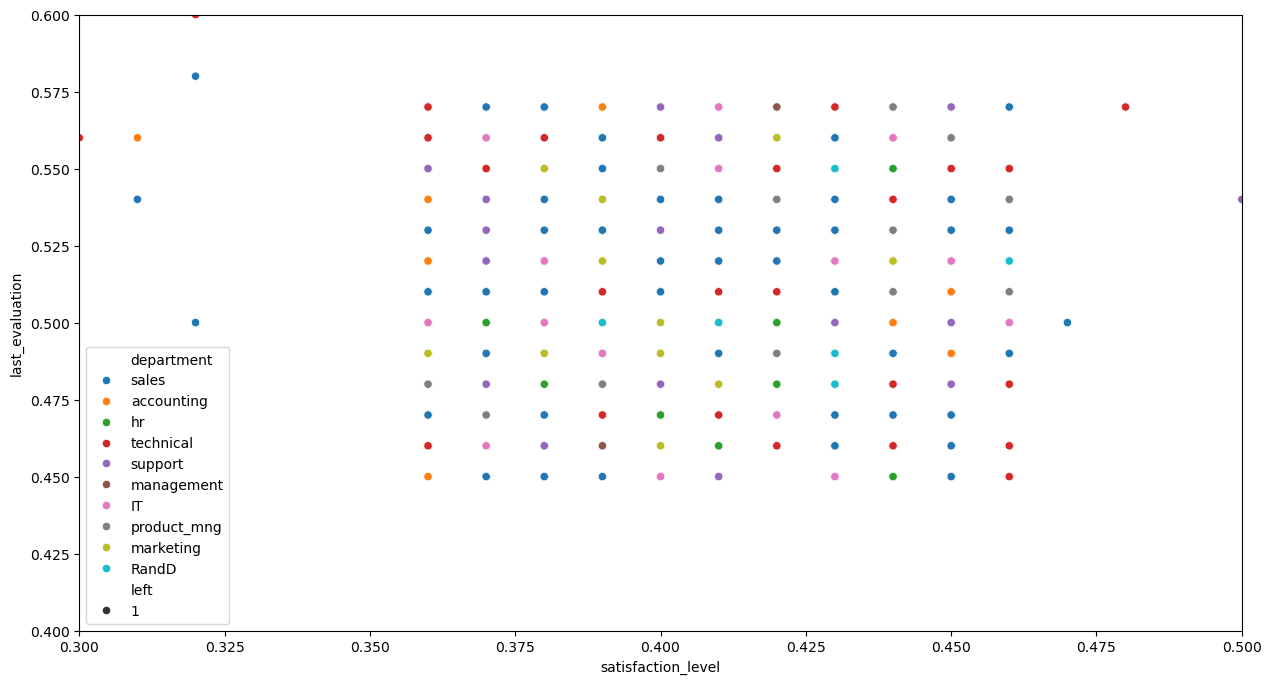

In [86]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df[df['left'] == 1], x = 'satisfaction_level', y = 'last_evaluation', hue = 'department', style = 'left')
plt.xlim(0.3, 0.5)  
plt.ylim(0.4, 0.6)
plt.show()


#* Different from the previous group, this group tends to have poor performance
#* The group are dominated by the top 3 most populated department which is Sales, Technical, and Support 
#* However the percentage (how many percent of left employee in that department are belong to that this group) are far differs
#  This group dominated by HR, marketing, and product_mng. that means almost half of the employee that left have these characteristic
#  - [satisfaction_level] between 0.3 - 0.5
#  - [last_evaluation] between 0.4 - 0.6
#* These people have under average amount of project done (avg 2), 
#  extremely low working hour (avg 144.7 hours/ month or 5.78 hour/day)



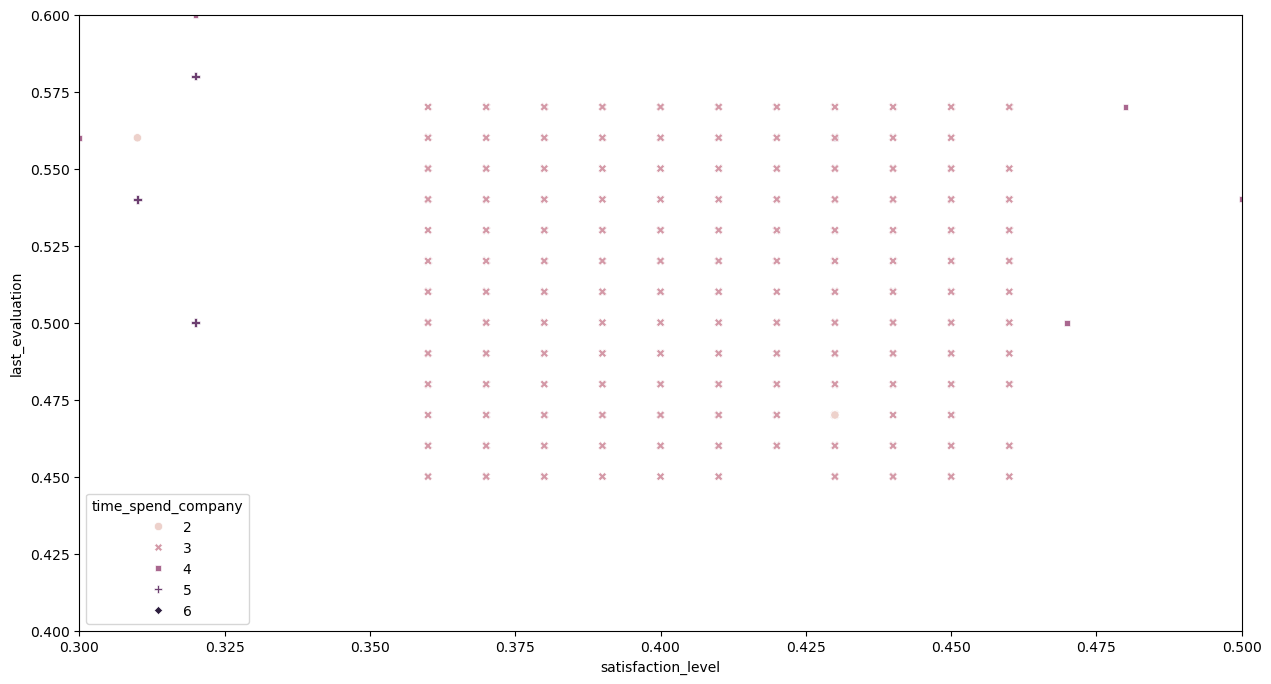

In [87]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df[df['left'] == 1], x = 'satisfaction_level', y = 'last_evaluation', hue = 'time_spend_company', style = 'time_spend_company')
plt.xlim(0.3, 0.5)  
plt.ylim(0.4, 0.6)
plt.show()

In [88]:
df.loc[
    #((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    ((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 0)
].describe()

# * This data describes the employes that have similar performance score but remains. 
#   they have more working hours and number of project compared to the ones who left


satisfaction_level  last_evaluation  number_project  \
count         2560.000000      2560.000000     2560.000000   
mean             0.652523         0.525418        3.747656   
std              0.217974         0.045985        1.013197   
min              0.120000         0.410000        2.000000   
25%              0.510000         0.500000        3.000000   
50%              0.670000         0.530000        4.000000   
75%              0.830000         0.560000        4.000000   
max              1.000000         0.590000        6.000000   

       average_monthly_hours  time_spend_company  work_accident    left  \
count            2560.000000         2560.000000    2560.000000  2560.0   
mean              195.389844            3.264844       0.175781     0.0   
std                46.749300            1.322608       0.380708     0.0   
min                96.000000            2.000000       0.000000     0.0   
25%               158.000000            2.000000       0.000000     0.0   
50%               193.000000            3.000000       0.000000     0.0   
75%               234.000000            4.000000       0.000000     0.0   
max               287.000000           10.000000       1.000000     0.0   

       promotion_last_5years  
count            2560.000000  
mean                0.017578  
std                 0.131438  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [89]:
df.loc[
    ((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    #((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 0)
].describe()



satisfaction_level  last_evaluation  number_project  \
count          905.000000       905.000000      905.000000   
mean             0.421227         0.651823        3.593370   
std              0.060038         0.172989        1.208543   
min              0.310000         0.360000        2.000000   
25%              0.370000         0.510000        3.000000   
50%              0.430000         0.630000        3.000000   
75%              0.480000         0.780000        4.000000   
max              0.490000         1.000000        6.000000   

       average_monthly_hours  time_spend_company  work_accident   left  \
count             905.000000          905.000000     905.000000  905.0   
mean              183.955801            3.479558       0.175691    0.0   
std                50.900761            1.518278       0.380767    0.0   
min                96.000000            2.000000       0.000000    0.0   
25%               143.000000            2.000000       0.000000    0.0   
50%               179.000000            3.000000       0.000000    0.0   
75%               225.000000            4.000000       0.000000    0.0   
max               287.000000           10.000000       1.000000    0.0   

       promotion_last_5years  
count             905.000000  
mean                0.019890  
std                 0.139698  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [90]:
df.groupby('department')['average_monthly_hours'].mean()

department
IT             200.638320
RandD          201.291066
accounting     200.877617
hr             199.371048
management     201.529817
marketing      199.487370
product_mng    198.893586
sales          200.242050
support        200.627128
technical      201.115419
Name: average_monthly_hours, dtype: float64

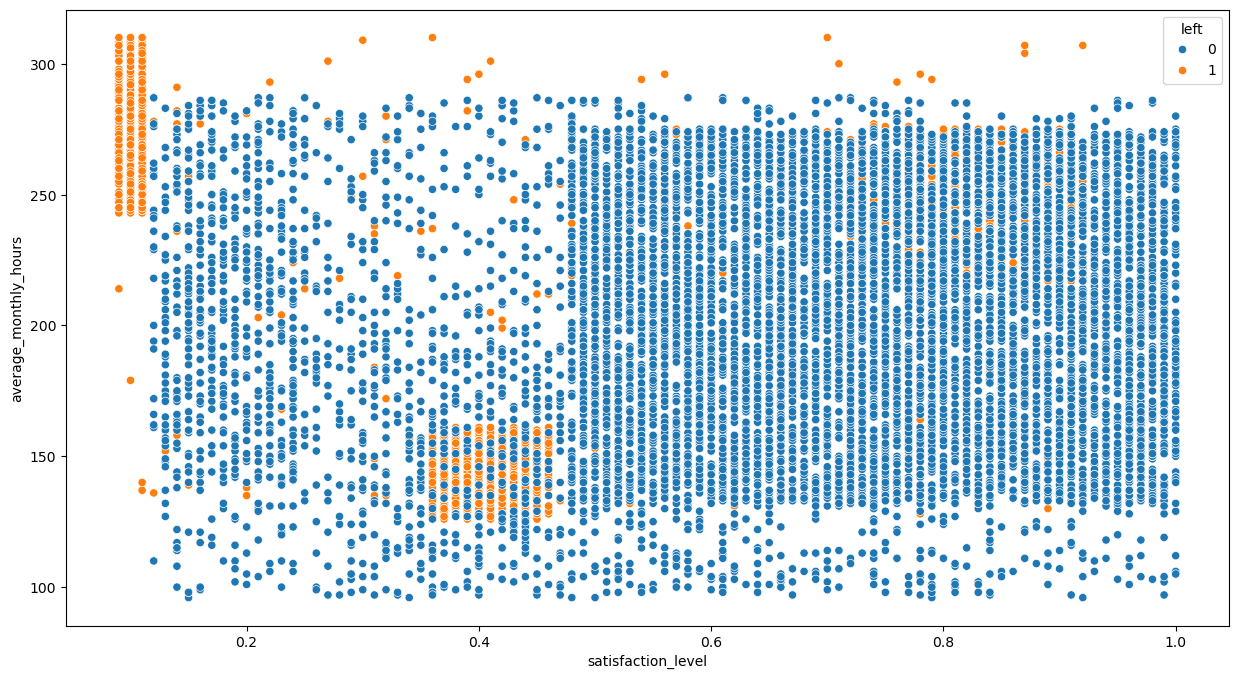

In [91]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df, x = 'satisfaction_level', y = 'average_monthly_hours', hue = 'left')
#plt.xlim(0.3, 0.5)  
#plt.ylim(0.4, 0.6)
plt.show()


# This data also proves that those belongs to the 2nd group have low working hours.
# other things to note is that satisfaction level doesnt corelates with average_monthly_hours
# the company also have a lot of variance when it comes to working hours




In [92]:
(df.loc[
    ((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    ((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 1)
].groupby('salary').size()/df[df['left']== 1].groupby('salary').size()).sort_values(ascending = False)

salary
high      0.500000
low       0.425894
medium    0.412224
dtype: float64

left  salary
0     high       942
      low       4566
      medium    4492
1     high        48
      low       1174
      medium     769
dtype: int64


<Axes: xlabel='left', ylabel='Count'>

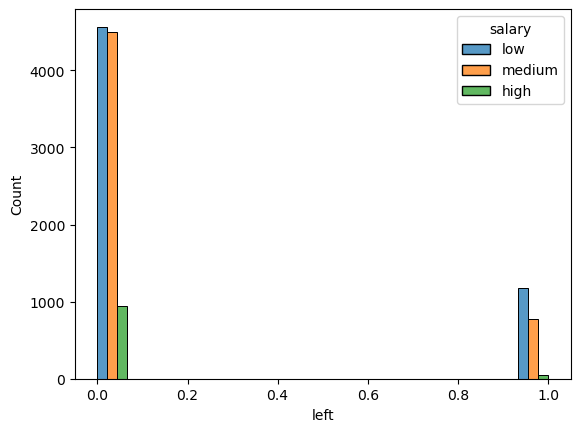

In [93]:
# Analysis regarding Salary
print(df.groupby(['left', 'salary']).size())
sns.histplot(data = df, x = 'left', hue = 'salary', multiple = 'dodge')
# we can see that most of the employee who's left have low and medium salary

<Axes: xlabel='satisfaction_level', ylabel='Count'>

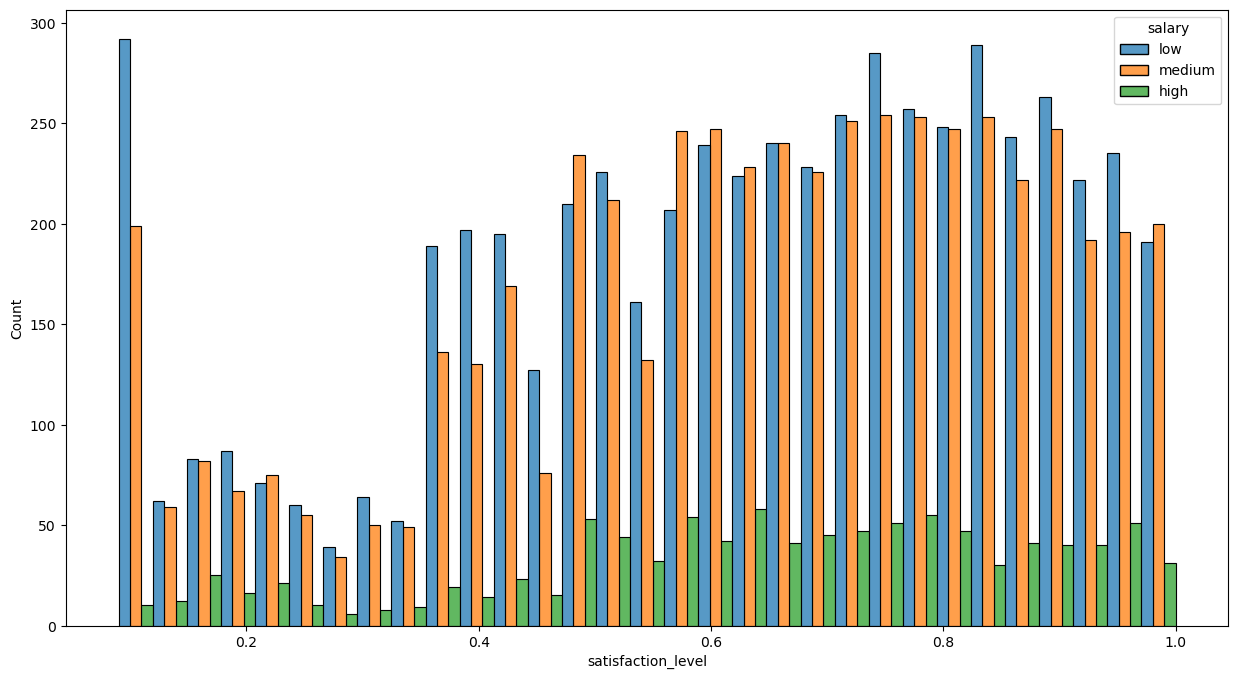

In [94]:
# Salary vs satisfaction correlation
plt.figure(figsize = (15, 8))
sns.histplot(data = df, x = 'satisfaction_level',hue = 'salary', multiple = 'dodge')
#We can see here that actually there are not many people have the satisfaction score below 0.4

<Axes: xlabel='satisfaction_level', ylabel='Percent'>

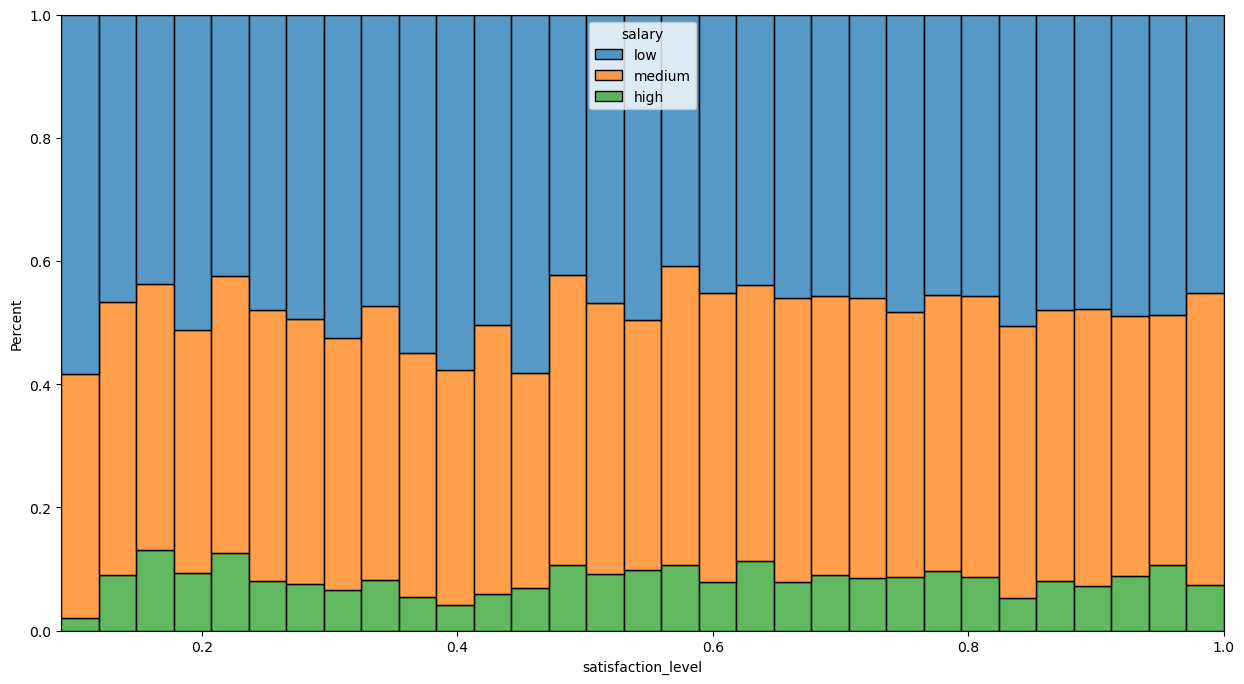

In [95]:
plt.figure(figsize = (15, 8))
sns.histplot(data = df, x = 'satisfaction_level',hue = 'salary', multiple = 'fill', stat = 'percent')
#We can see here that actually there are not many people have the satisfaction score below 0.4 
#However we can see that the proportions of each interval doesnt differs much from the others means that 
#there are no clear proof that salary effects satisfaction level. 
#This further strenghten our finding with pearson correlation we did earlier that [satisfaction_level] are not corelated by [salary]

<Axes: xlabel='department', ylabel='Percent'>

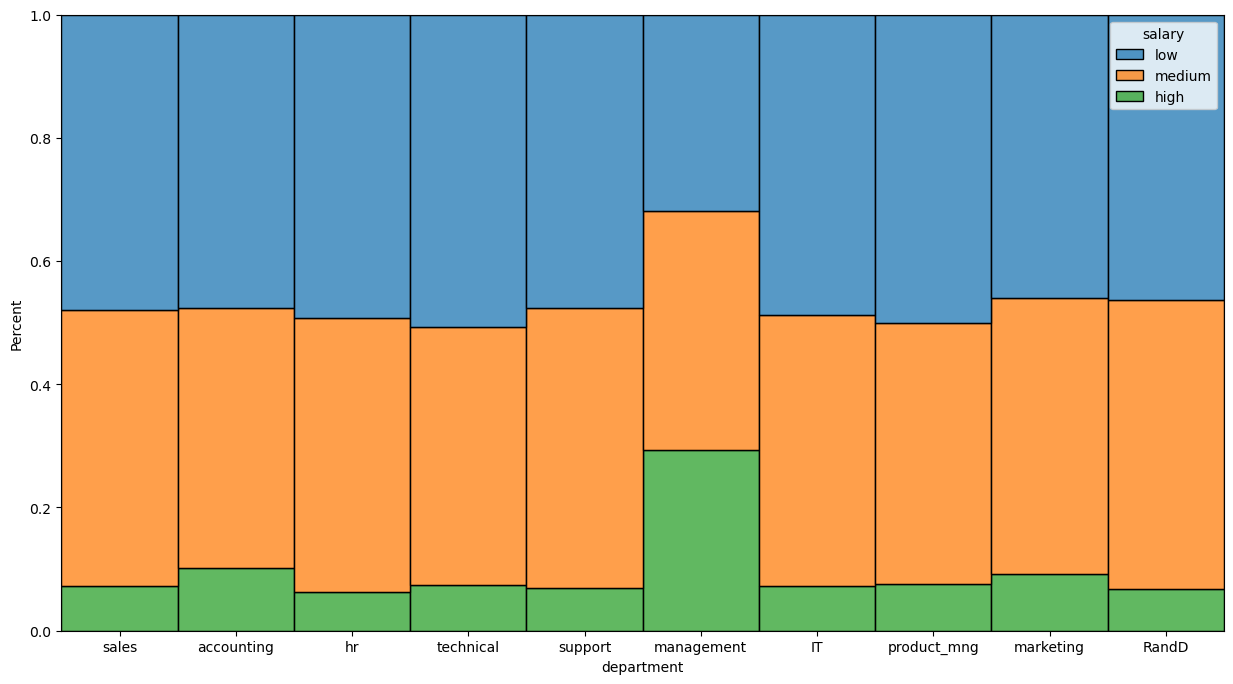

In [96]:
plt.figure(figsize = (15, 8))
sns.histplot(data = df, x = 'department',hue = 'salary', multiple = 'fill', stat = 'percent')
# the plots here aree  mostly uniform in terms of how many percent of people have high salary.
# only management who does have higher 'high salary' ratio htan other department
# this can be either good sign or bad sign. a good sign because most of them are proportional and a bad sign since in some cases employee from some department are usually have higher salary
# employee from department that requires uncommon skills like rnd, technical, it, accounting are usually have higher salary compared to the department that doesnt need niche skill set


* the plots here aree  mostly uniform in terms of how many percent of people have high salary.
 
* only management who does have higher 'high salary' ratio htan other department

    > this can be either good sign or bad sign. a good sign because most of them are proportional and a bad sign since in some cases, employee from some department are usually have higher salary
 
    > employee from department that requires uncommon skills like rnd, technical, it, accounting are usually have higher salary compared to the department that doesnt need niche skill set

    > with those with high skill requirement also receive the same salary, it might results on employee feeling dissatisfied 

Text(0.5, 1.0, 'satisfaction_level per department')

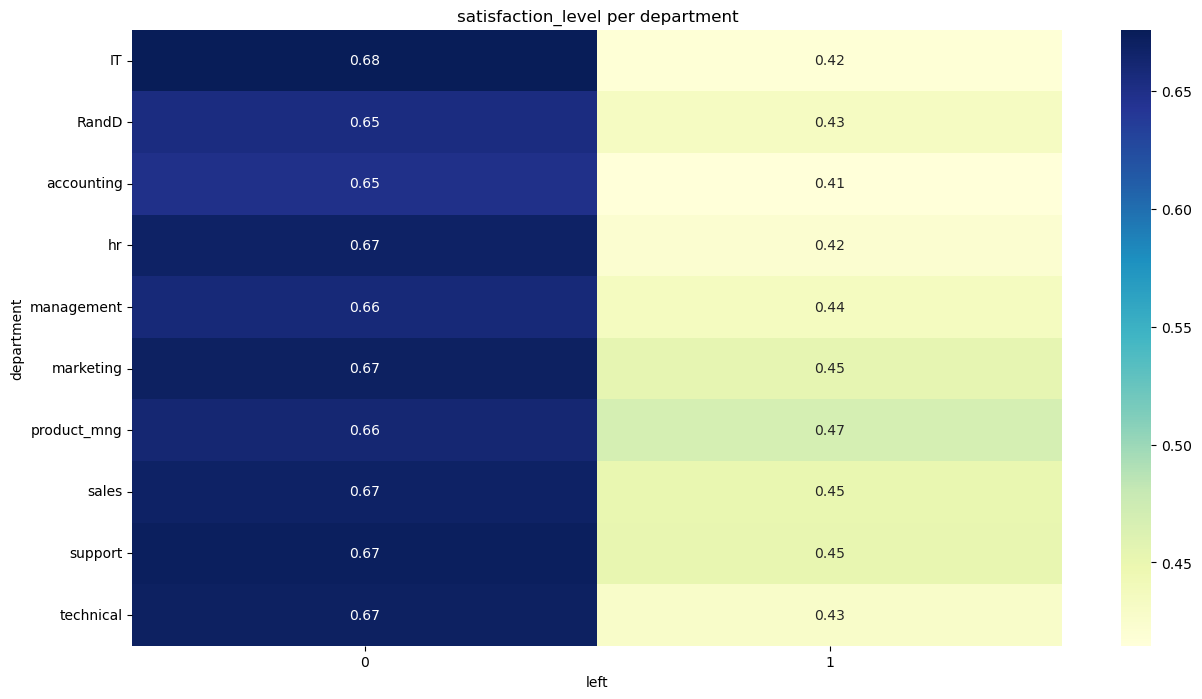

In [98]:
plt.figure(figsize = (15, 8))
pivot_table = df.pivot_table(values='satisfaction_level', index='department', columns='left', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")

plt.title('satisfaction_level per department')

#Hr with high salary have higher satisfaction_level. although if we observe carefully, the better answer is that 

0.2646775506726386


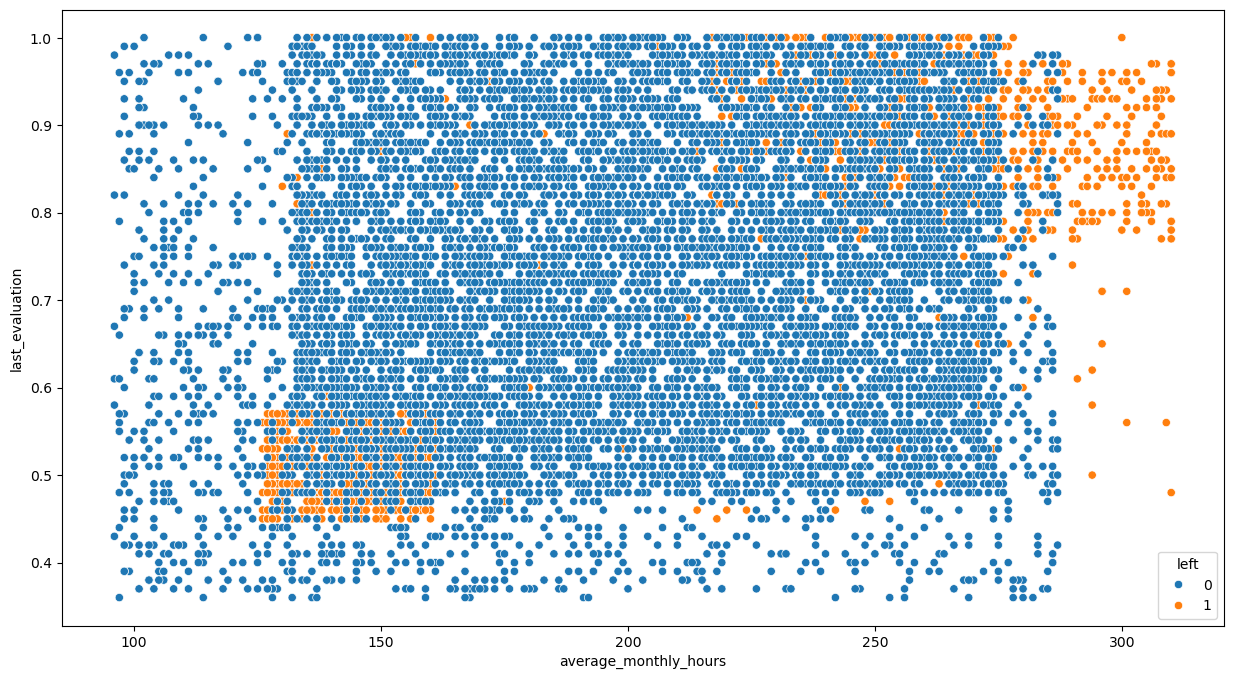

In [99]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (15, 8))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left')
print(df['average_monthly_hours'].corr(df['last_evaluation']))


<Axes: xlabel='average_monthly_hours', ylabel='Count'>

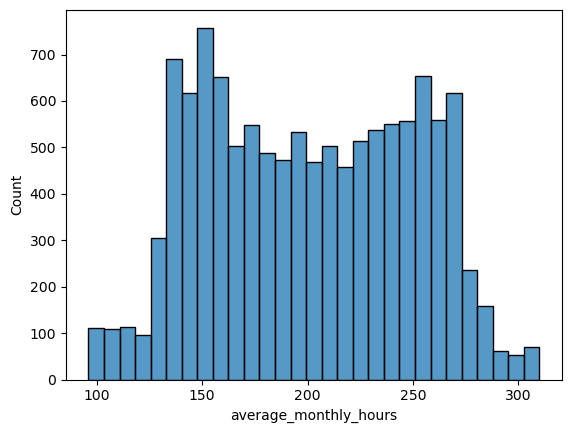

In [100]:
sns.histplot(df['average_monthly_hours'])

In [101]:
salary_mapping = {'low' : 1, 'medium' :  2, 'high' : 3}
df['salary_numeric'] = df['salary'].map(salary_mapping)
df.corr(numeric_only = True)

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.095186       -0.133246   
last_evaluation                  0.095186         1.000000        0.270256   
number_project                  -0.133246         0.270256        1.000000   
average_monthly_hours           -0.006252         0.264678        0.331516   
time_spend_company              -0.152915         0.096829        0.188837   
work_accident                    0.039940        -0.005695       -0.005612   
left                            -0.350558         0.013520        0.030928   
promotion_last_5years            0.019789        -0.007206       -0.000544   
salary_numeric                   0.029241        -0.015775       -0.000502   

                       average_monthly_hours  time_spend_company  \
satisfaction_level                 -0.006252           -0.152915   
last_evaluation                     0.264678            0.096829   
number_project                      0.331516            0.188837   
average_monthly_hours               1.000000            0.102875   
time_spend_company                  0.102875            1.000000   
work_accident                      -0.012860            0.000003   
left                                0.070409            0.173295   
promotion_last_5years              -0.004964            0.056828   
salary_numeric                     -0.000551            0.038164   

                       work_accident      left  promotion_last_5years  \
satisfaction_level          0.039940 -0.350558               0.019789   
last_evaluation            -0.005695  0.013520              -0.007206   
number_project             -0.005612  0.030928              -0.000544   
average_monthly_hours      -0.012860  0.070409              -0.004964   
time_spend_company          0.000003  0.173295               0.056828   
work_accident               1.000000 -0.125436               0.029852   
left                       -0.125436  1.000000              -0.044657   
promotion_last_5years       0.029852 -0.044657               1.000000   
salary_numeric             -0.000058 -0.118882               0.087851   

                       salary_numeric  
satisfaction_level           0.029241  
last_evaluation             -0.015775  
number_project              -0.000502  
average_monthly_hours       -0.000551  
time_spend_company           0.038164  
work_accident               -0.000058  
left                        -0.118882  
promotion_last_5years        0.087851  
salary_numeric               1.000000

In [102]:
df.loc[
    ((df['satisfaction_level'] < 0.5) & (df['satisfaction_level'] > 0.3)) &
    ((df['last_evaluation'] > 0.4) & (df['last_evaluation'] < 0.6)) &
    (df['left'] == 1)
].groupby('salary').size().sort_values(ascending = False)

salary
low       500
medium    317
high       24
dtype: int64

<Axes: xlabel='time_spend_company', ylabel='Count'>

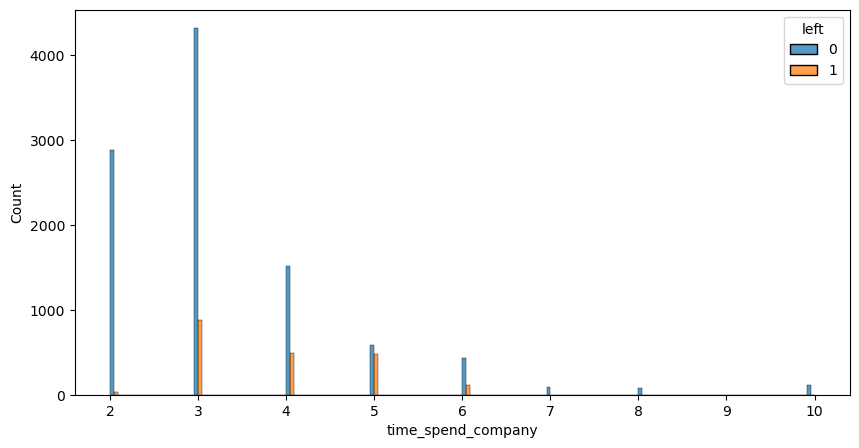

In [103]:
plt.figure(figsize = (10,5))
sns.histplot(data = df, x = 'time_spend_company', hue = 'left', multiple = 'dodge')

<Axes: xlabel='time_spend_company', ylabel='satisfaction_level'>

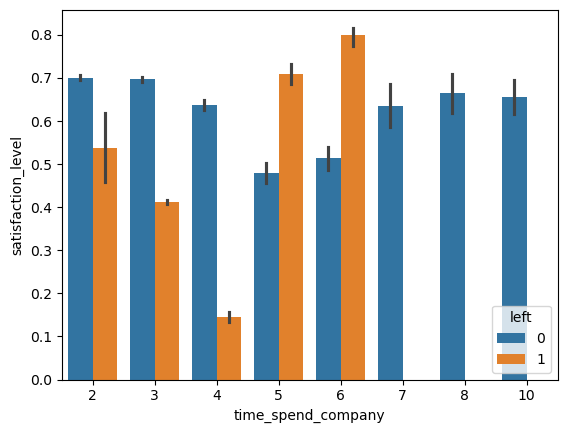

In [104]:
sns.barplot(data = df, x = 'time_spend_company', y = 'satisfaction_level', hue = 'left')

Text(0.5, 1.0, 'satisfaction_level per time_spend_compnay')

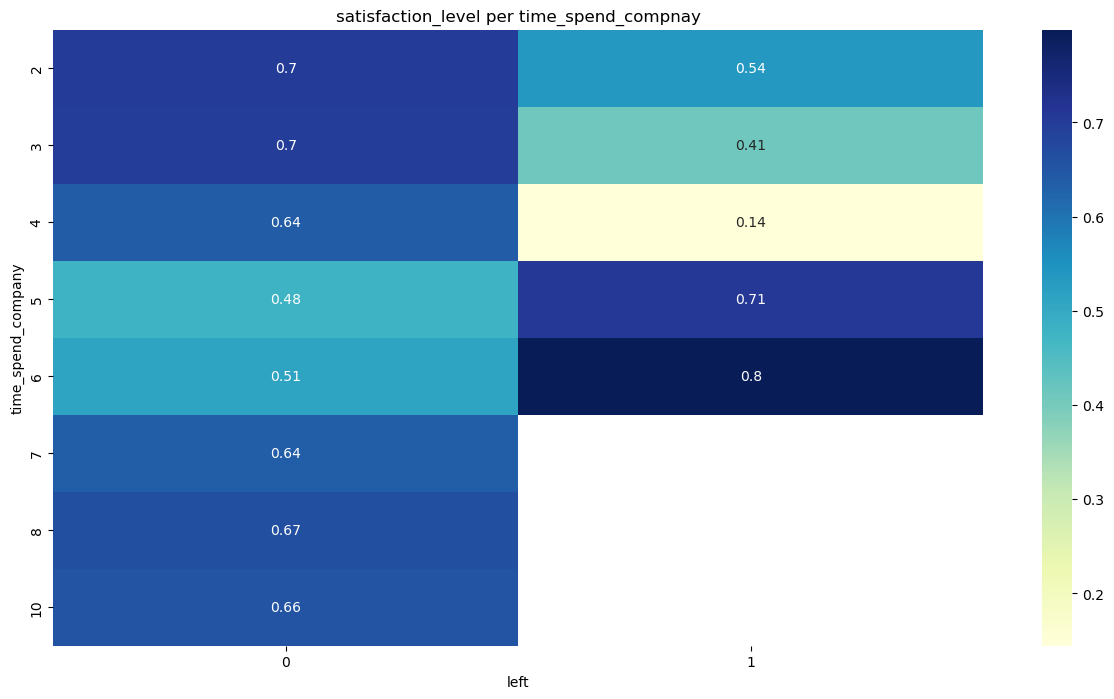

In [105]:
plt.figure(figsize = (15, 8))
pivot_table = df.pivot_table(values='satisfaction_level', index='time_spend_company', columns='left', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")

plt.title('satisfaction_level per time_spend_compnay')

In [106]:
df.groupby(['time_spend_company', 'left'])['satisfaction_level'].size()

time_spend_company  left
2                   0       2879
                    1         31
3                   0       4316
                    1        874
4                   0       1510
                    1        495
5                   0        580
                    1        482
6                   0        433
                    1        109
7                   0         94
8                   0         81
10                  0        107
Name: satisfaction_level, dtype: int64

<Axes: xlabel='time_spend_company', ylabel='Percent'>

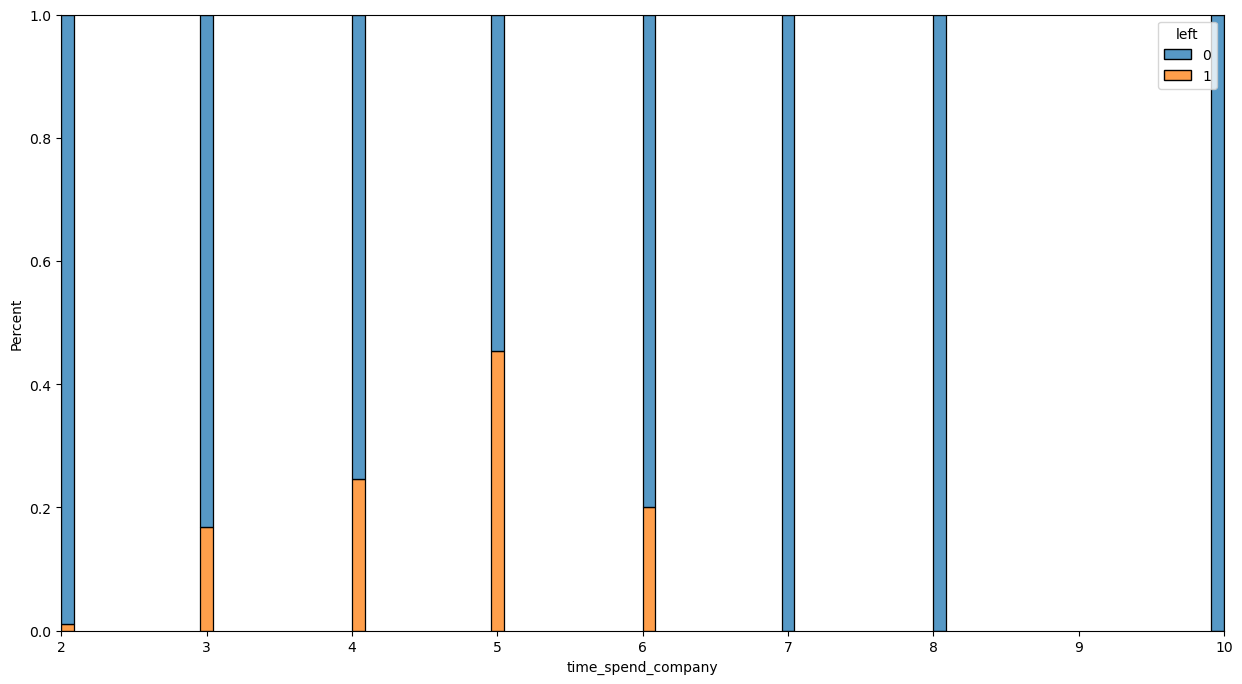

In [107]:
plt.figure(figsize = (15, 8))
sns.histplot(data = df, x = 'time_spend_company',hue = 'left', multiple = 'fill', stat = 'percent')

* The person who left after 5 years of work seems to have a good satisfaction level compared those before 5 years of work. this is odd considering the proportions of employee who left peaks at 5 years.
* Before reaching 4 years, satisfactional level between employee who left are seems to be declining year by year.

* In contrast, employee that still works have their satisfaction level drops at year 5.
* In year 5, it seems that employee who left are more satisfied than employee who still continue working

* There must be something happening between year 4 and 5 resulting in proportionally large resigns from the employee perspective, yet their resigns is fuelled with satisfaction rather than dissatisfaction. in contrast, employee who doesn't left seems to have less satisfaction.

<Axes: xlabel='number_project', ylabel='average_monthly_hours'>

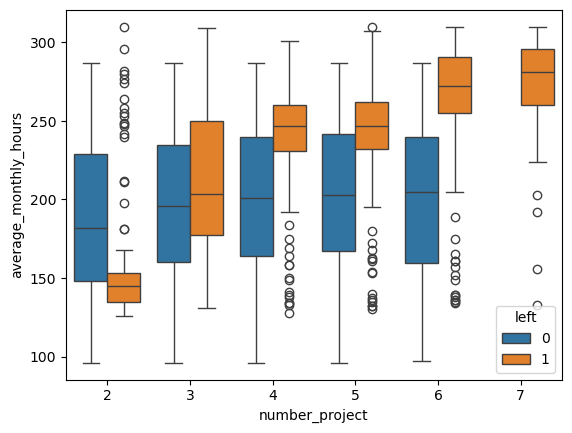

In [109]:
sns.boxplot(data = df, x = 'number_project', y = 'average_monthly_hours', hue = 'left')

<Axes: xlabel='number_project', ylabel='average_monthly_hours'>

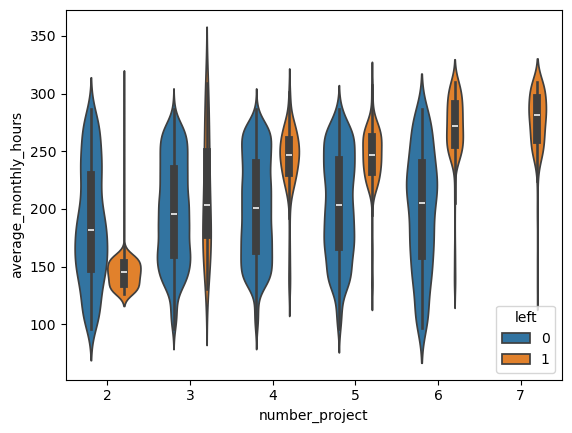

In [110]:
sns.violinplot(data = df, x = 'number_project', y = 'average_monthly_hours', hue = 'left')

<Axes: xlabel='time_spend_company', ylabel='average_monthly_hours'>

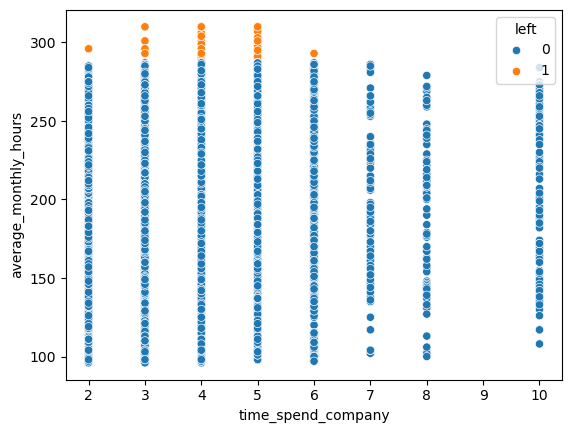

In [111]:
sns.scatterplot(data = df, x = 'time_spend_company', y = 'average_monthly_hours', hue = 'left')

Text(0.5, 1.0, 'average_monthly_hours per time_spend_compnay')

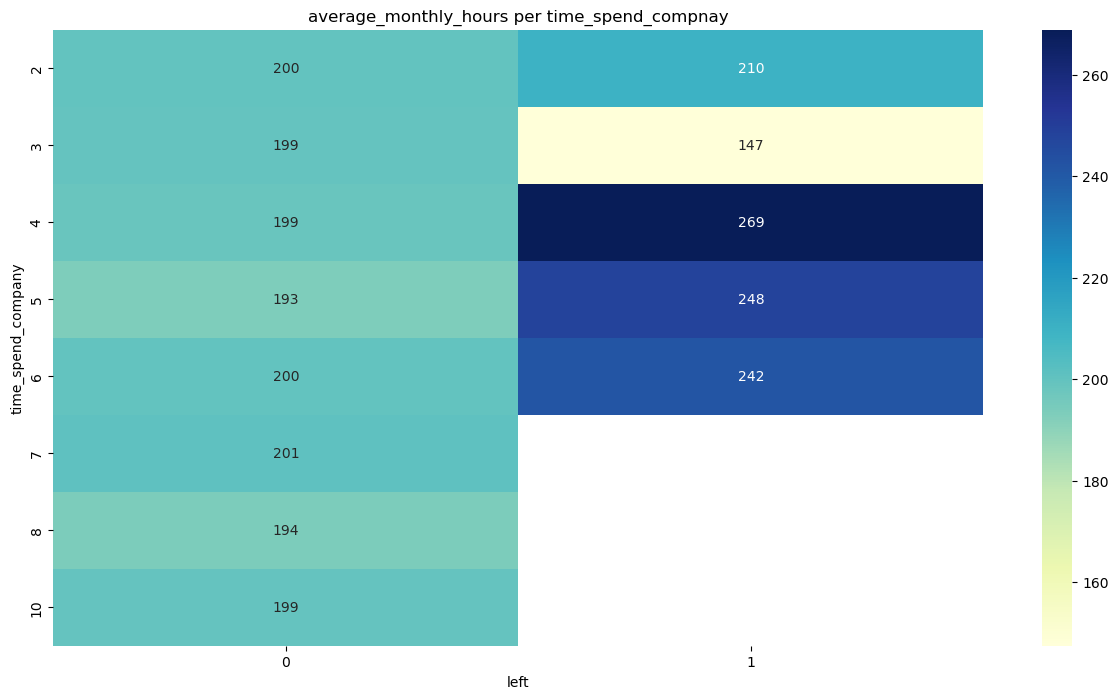

In [112]:
plt.figure(figsize = (15, 8))
pivot_table = df.pivot_table(values='average_monthly_hours', index='time_spend_company', columns='left', aggfunc='mean')
sns.heatmap(pivot_table, annot=True,fmt=".0f", cmap="YlGnBu")

plt.title('average_monthly_hours per time_spend_compnay')

In [113]:
df.groupby(['number_project', 'left']).size()

number_project  left
2               0        725
                1        857
3               0       3482
                1         38
4               0       3448
                1        237
5               0       1890
                1        343
6               0        455
                1        371
7               1        145
dtype: int64

In [114]:
grouped = df.groupby(['number_project', 'left']).size()

grouped.groupby(level=0).apply(lambda x: x / x.sum())

number_project  number_project  left
2               2               0       0.458281
                                1       0.541719
3               3               0       0.989205
                                1       0.010795
4               4               0       0.935685
                                1       0.064315
5               5               0       0.846395
                                1       0.153605
6               6               0       0.550847
                                1       0.449153
7               7               1       1.000000
dtype: float64

In [115]:
df.groupby(['number_project', 'left'])['average_monthly_hours'].mean()

number_project  left
2               0       186.880000
                1       146.143524
3               0       197.177197
                1       212.052632
4               0       201.241879
                1       242.143460
5               0       202.706349
                1       244.495627
6               0       198.617582
                1       269.361186
7               1       275.620690
Name: average_monthly_hours, dtype: float64

<Axes: xlabel='number_project', ylabel='average_monthly_hours'>

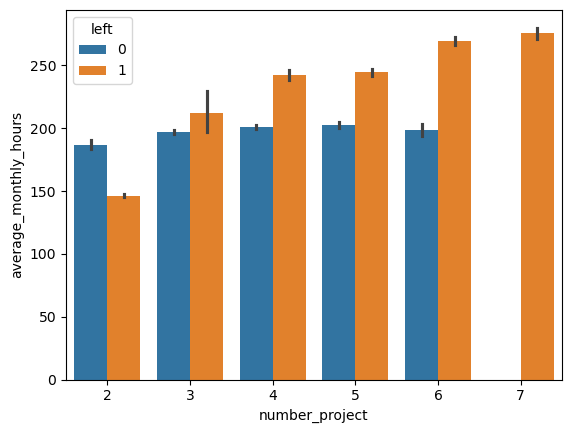

In [116]:
sns.barplot(data = df, y = 'average_monthly_hours', x = 'number_project', hue = 'left')

We can see a trend here where who works on more projects tend to increases in monthly hours too. But this only applies to those who left. Meanwhile those who didn't left have a stable working hours no matter how many projects they handle.

In [118]:

group1 = df.groupby(['number_project', 'left']).mean(numeric_only = True).reset_index()
group1

number_project  left  satisfaction_level  last_evaluation  \
0                2     0            0.601586         0.663545   
1                2     1            0.412345         0.517888   
2                3     0            0.690640         0.716893   
3                3     1            0.577368         0.765263   
4                4     0            0.689983         0.725044   
5                4     1            0.756793         0.890464   
6                5     0            0.657614         0.723116   
7                5     1            0.745773         0.898601   
8                6     0            0.463165         0.687341   
9                6     1            0.132561         0.861698   
10               7     1            0.116690         0.863517   

    average_monthly_hours  time_spend_company  work_accident  \
0              186.880000            3.380690       0.180690   
1              146.143524            3.022170       0.052509   
2              197.177197            3.136990       0.177484   
3              212.052632            3.842105       0.026316   
4              201.241879            3.191705       0.166473   
5              242.143460            4.881857       0.075949   
6              202.706349            3.348148       0.176720   
7              244.495627            5.014577       0.046647   
8              198.617582            4.204396       0.193407   
9              269.361186            4.094340       0.061995   
10             275.620690            4.110345       0.013793   

    promotion_last_5years  salary_numeric  
0                0.019310        1.631724  
1                0.005834        1.429405  
2                0.017806        1.647042  
3                0.000000        1.473684  
4                0.021462        1.620070  
5                0.008439        1.417722  
6                0.017460        1.651852  
7                0.000000        1.454810  
8                0.026374        1.648352  
9                0.002695        1.428571  
10               0.000000        1.448276

<Axes: xlabel='number_project', ylabel='average_monthly_hours'>

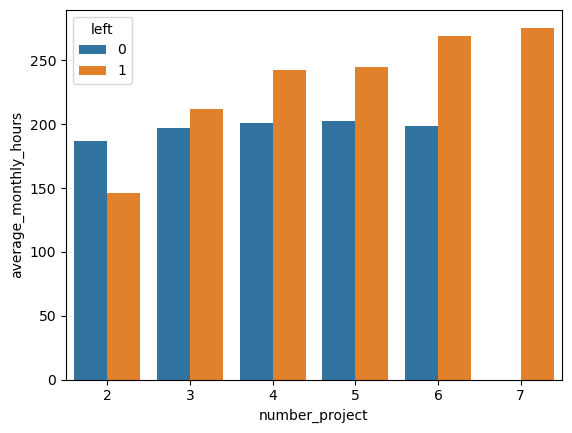

In [119]:
sns.barplot(data=group1, x='number_project', y='average_monthly_hours', hue='left')

<Axes: xlabel='number_project', ylabel='last_evaluation'>

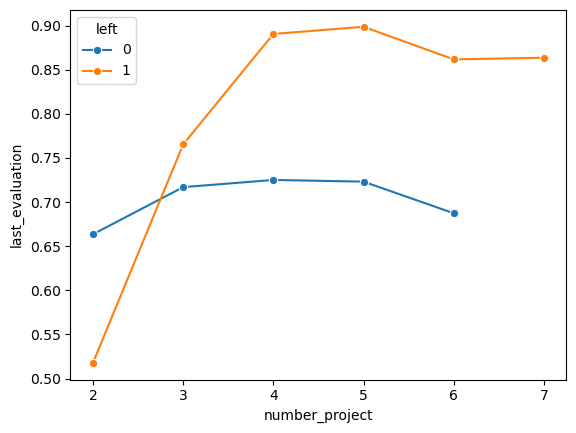

In [120]:
sns.lineplot(data=group1, x='number_project', y='last_evaluation', hue='left', marker='o')

<Axes: xlabel='number_project', ylabel='satisfaction_level'>

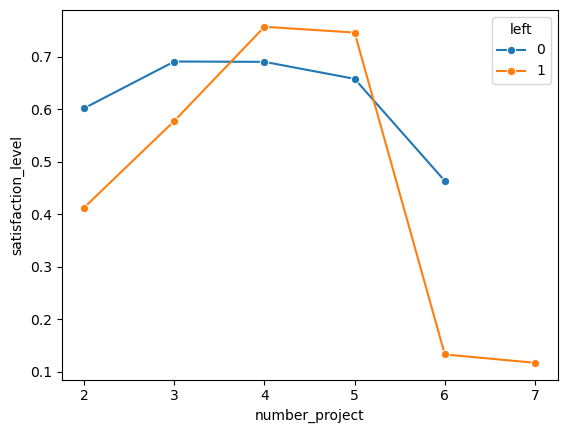

In [121]:
sns.lineplot(data=group1, x='number_project', y='satisfaction_level', hue='left', marker='o')

<Axes: xlabel='number_project', ylabel='salary_numeric'>

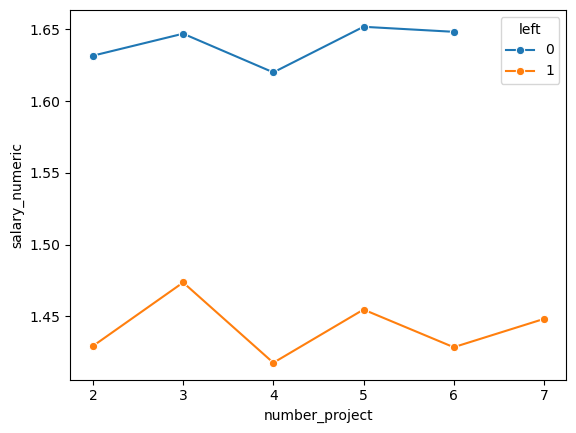

In [122]:
sns.lineplot(data = group1, x = 'number_project', y = 'salary_numeric', hue = 'left', marker = 'o')

<Axes: xlabel='number_project', ylabel='promotion_last_5years'>

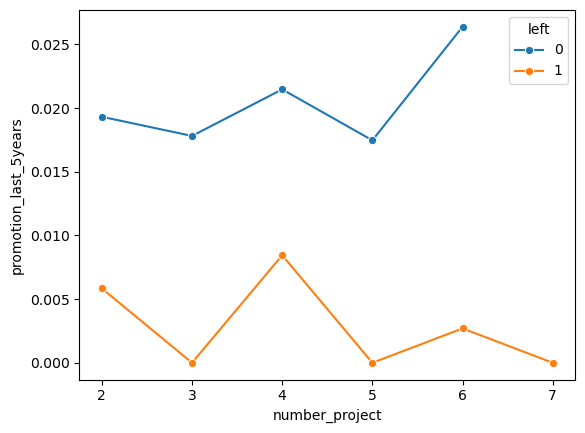

In [123]:
sns.lineplot(data = group1, x = 'number_project', y = 'promotion_last_5years', hue = 'left', marker = 'o')

PROBLEM :
people who left:
> People who works on multiple projects works extra hours

> They who works on extra hours have a evaluation level

> Their satisfaction level doesn't seems to follow the same trend

> However satisfaction level seems to follow the time spend company pattern which significantly drops at 4 years and peaks at 5 to 6 years of working

> Those people who gives their best in working more projects, working for longer hours have lower salary (by lower means there are more people with higher salary in average than this 'left' group). They also in average has less promotions compared to the one that are remains

> Working on more project doesn't seems to be an indicator of competence in the company's eye. people who works on lesser projects have lesser promotions (in proportion)

* First of all, there are absolutely no one who continues working after 7 projects. For some reason 7 pro

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

* There are no parameter that has a close relation one with each other. this means that we can safely say that each parameter represents each own value
* By comparing statisfaction level vs last evaluation, Employee who's left are forming a group with:
    >  1st Group
    
        - High performance rate [last_evaluation]
    
        - Mostly low salary [salary]
  
        - Extremely low satisfactional level [satisfaction_level]
  
        - Extremely high working hour [average_monthly_hours]
  
        - Proportions (percentage who left the company that belongs to this group) are mildly dominated by department with high
  
          skillset requirement [departmeent]
  
        - Contributing to large number of projects [number_project]
    
    > 2nd Group
    
        - Mildly low performance rate [last_evaluation]
  
        - Mildly low satisfactional level [satisfaction_level]
  
        - Mostly low salary [salary]
  
        - Low working hour [average_monthly_hours]
  
        - Noteably HR department have 50% of their employee that left belongs to this group

        - Almost everyone in this group left after 3 years

1ST GROUP

* Among the first group, there are clear sign of miss management. These people works significantly more hours than other employee, does more project than other employee, and even has high performance rate but doesnt get enough rewards from their hard work reflected by their low salary and satisfaction level
* In Technical, RND, and IT department, more than 28% of the total employee who left belongs to this group which proves that these guys has a some a good skillset that might be harder to get compared to some other regular department like sales and marketing.
* It is highly recommended to re-arrange the policy for rewarding  employees that belongs to this group because they actually the one who works the hardest, the smartest, and the most rare employees that we can find.


2ND GROUP
* Among the 2nd group, employees are much different compared to the 1st group.
* For some reason, they're grouped in some specific parameter number
    > [satisfaction_leve] between 0.3 - 0.5
    
    > [last_evaluation] between 0.4 - 0.6
* Their working hours are considered low compared to the average and standard working hour which is 200 hr/month or 8 hours a day. (theirs are 144.7 hours a month or 5.78 hours per day)
* These employees dont really stand out from other employees. In fact they are worse than the average employee in terms of experience (by project done), work ethics (hours worked), and skills (evaluation score).
* They all mostly quit after 3 years of work. perhaps this could be a clue to an unique event. 
* However there are no clear reason why these specific numbers become a reason they left. perhaps more information are needed to further identify the problem.
* Other speculation is that the one belongs to this group are 'fired' instead of 'left' which led up to a mistake in data collecting. Either way:
  
**Further analysis/ troubleshooting can begin by analyzing HR, marketing, and product_mng since almost 50% of the employees in their department who left are belong to thiis group**


* By comparing through the number of project and time spend company:
    > There are a unique trend where people who left after 5 years of work tends to have a significcantly higher satisfaction level, even higher than those who didn't left
    
    > Employee who left tends to have more working hours as they adds up in number of projects, meanwhile the employee who didn't left have a constant work hours that averages at 200 hours/month (exception on the employee who only works 2 projects. These employee most likely didn't last long in the company as figured out that they didn't fit the job)
    
    > Those who left in average has less salary, less promotion, but high evaluation score, which is weird given they excel in their job, work extra hours, but didn't get the appreciation they deserve
    
    >  
OVERALL
* This company have mildly bad performance score and satisfaction level
* Further investigation are needed to troubleshoot what happen to the 2nd left group
* There might be a loop hole in the employee's contract that benefits employee if they quit after 5 years causing the satisfacction level and proportions of people who left sky rocketed. This has to be investigated since the current parameters are not feasible to gives an exact causes

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [138]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [139]:
df.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  salary_numeric  
0     low               1  
1  medium               2  
2  medium               2  
3     low               1  
4     low               1

In [140]:
df_coded = df.drop(columns = 'salary_numeric')
df_coded.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [141]:
df_coded = pd.get_dummies(df_coded, drop_first = True)
df_coded.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   time_spend_company  work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  salary_low  \
0              True               False                 False        True   
1              True               False                 False       False   
2              True               False                 False       False   
3              True               False                 False        True   
4              True               False                 False        True   

   salary_medium  
0          False  
1           True  
2           True  
3          False  
4          False

In [142]:
x = df_coded.drop(columns = 'left')
y = df_coded[['left']]

print(x.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation         11991 non-null  float64
 2   number_project          11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   time_spend_company      11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   promotion_last_5years   11991 non-null  int64  
 7   department_RandD        11991 non-null  bool   
 8   department_accounting   11991 non-null  bool   
 9   department_hr           11991 non-null  bool   
 10  department_management   11991 non-null  bool   
 11  department_marketing    11991 non-null  bool   
 12  department_product_mng  11991 non-null  bool   
 13  department_sales        11991 non-null  bool   
 14  department_support      11991 non-null  boo

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9592, 18), (9592, 1), (2399, 18), (2399, 1))

In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
x_train_scaled = StandardScaler().fit_transform(x_train)

In [145]:
clf = LogisticRegression()
clf_params = {'max_iter' : [1000],
              'penalty' : ['l2'],
              'C' : [0.01, 0.1, 1, 10, 100],
              'solver' : ['liblinear']}

              
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Use OneVsRestClassifier if you're doing multi-class
from sklearn.multiclass import OneVsRestClassifier
clf_cv = GridSearchCV(
    estimator=clf,
    param_grid=clf_params,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    refit='recall',
    cv=5)


In [146]:
%%time

clf_cv.fit(x_train_scaled, y_train.squeeze())

CPU times: total: 5.62 s
Wall time: 6.08 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                         'penalty': ['l2'], 'solver': ['liblinear']},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [147]:
import pickle
path = 'C:\\Users\\User\\Datasets\\'
#with open(path + 'clf_cv_model_p.pickle', 'rb') as to_read:
#    clf_cv = pickle.load(to_read)

In [148]:
#import pickle
#path = 'C:\\Users\\User\\Datasets\\'
#with open (path + 'clf_cv_model_p.pickle', 'wb')as to_write:
#    pickle.dump(clf_cv, to_write)

In [149]:
#clf = LogisticRegression(max_iter = 1000).fit(x_train_scaled, y_train.squeeze())

In [150]:
clf_cv.best_score_


0.21659213392959523

In [151]:
clf_cv.best_estimator_

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [152]:
#best_model = clf_cv.best_estimator_

# Get the slope and intercept
#print("Coefficients (slope):", best_model.coef_)
#print("Intercept:", best_model.intercept_)

In [153]:
x_test_scaled = StandardScaler().fit_transform(x_test)
y_pred = clf_cv.predict(x_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

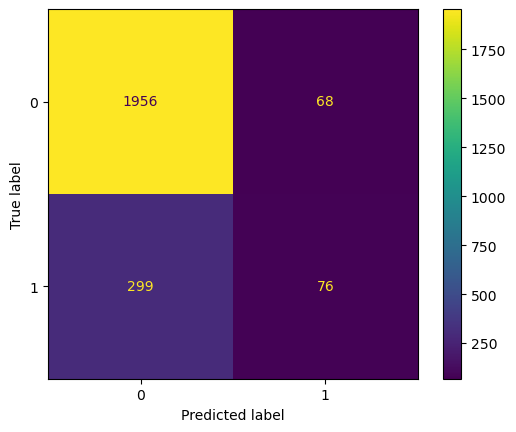

In [154]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf_cv.classes_)
disp.plot()

In [155]:
accuracy = metrics.accuracy_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

In [156]:
print ('Accuracy = ' + str(accuracy))
print ('Recall = ' + str(recall))
print ('Precision = ' + str(precision))
print ('F1 score = ' + str(f1))

Accuracy = 0.8470195914964569
Recall = 0.20266666666666666
Precision = 0.5277777777777778
F1 score = 0.2928709055876686


In [157]:
table = pd.DataFrame({'Model' : 'Linear Regression test', 'F1' : [f1], 'Recall' : [recall], 'Precision' : [precision], 'Accuracy' : [accuracy]})
table

Model        F1    Recall  Precision  Accuracy
0  Linear Regression test  0.292871  0.202667   0.527778   0.84702

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf_params = {'max_depth' : [None, 10, 50],
             'n_estimators' : [100, 200, 300],
             'min_samples_split' : [2, 5, 10],
             'min_samples_leaf' : [1, 3, 6], 
             'max_features' : ['sqrt', 'log2']
            }
rf = RandomForestClassifier(random_state = 0)
scoring = ['accuracy', 'precision', 'recall', 'f1']
rf_cv = GridSearchCV(rf, rf_params, scoring = scoring, cv = 5, refit = 'recall')

In [160]:
%%time
#rf_cv.fit(x_train, y_train.squeeze())

CPU times: total: 0 ns
Wall time: 0 ns


In [161]:
#path = 'C:\\Users\\User\\Datasets\\'
#with open (path + 'rf_cv_model_p_HRCapstone.pickle', 'wb')as to_write:
#    pickle.dump(rf_cv, to_write)
    

In [164]:
with open(path + 'rf_cv_model_p_HRCapstone.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [166]:
def make_results(model_name, model_object):
    
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(),:]

    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table1 = pd.DataFrame()
    
    table1 = pd.DataFrame({'Model' : [model_name],
                        'F1' : [f1],
                        'Recall' : [recall],
                        'Precision' : [precision], 
                        'Accuracy' : [accuracy]})
    return table1
    

rf_cv_results = make_results('Random Forest CV results', rf_cv)
rf_cv_results

Model        F1    Recall  Precision  Accuracy
0  Random Forest CV results  0.945786  0.909032   0.985977  0.982485

In [168]:
results = pd.concat([table, rf_cv_results])
results

Model        F1    Recall  Precision  Accuracy
0    Linear Regression test  0.292871  0.202667   0.527778  0.847020
0  Random Forest CV results  0.945786  0.909032   0.985977  0.982485

In [170]:
y_pred_rf = rf_cv.predict(x_test)

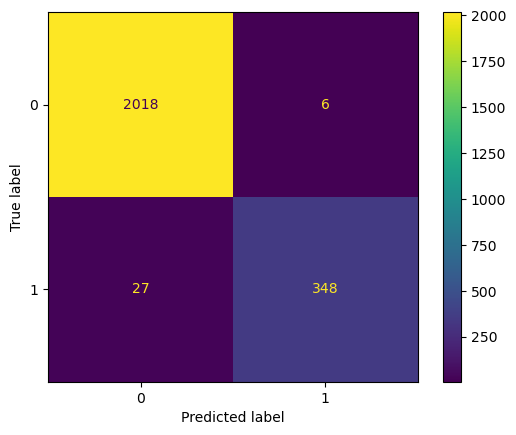

In [172]:
cm = metrics.confusion_matrix(y_test, y_pred_rf, labels = rf_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_cv.classes_)
disp.plot()

In [185]:
def get_test (model_name, y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    
    table = pd.DataFrame({'Model' : model_name, 'F1' : [f1], 'Recall' : [recall], 'Precision' : [precision], 'Accuracy' : [accuracy]})
    return table



In [189]:
rf_table_test = get_test('Random Forest Test', y_test, y_pred_rf)
results = pd.concat([results, rf_table_test])
results


Model        F1    Recall  Precision  Accuracy
0    Linear Regression test  0.292871  0.202667   0.527778  0.847020
0  Random Forest CV results  0.945786  0.909032   0.985977  0.982485
0        Random Forest Test  0.954733  0.928000   0.983051  0.986244

In [191]:
from xgboost import XGBClassifier, plot_importance

In [197]:
xgb_params = {'max_depth' : [None, 4, 8, 10],
              'min_child_weight' : [1, 3, 5],
              'n_estimators' : [50, 100, 300],
              'learning_rate' : [0.05, 0.1, 0.3]
             }

xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)
xgb_cv = GridSearchCV(estimator = xgb, param_grid = xgb_params, scoring = scoring, cv = 5, refit = 'recall')

In [199]:
%%time
xgb_cv.fit(x_train, y_train)

CPU times: total: 19min 53s
Wall time: 5min 4s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [None, 4, 8, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [203]:
xgb_cv_results = make_results('XGBoost CV Results', xgb_cv)
xgb_cv_results

Model        F1    Recall  Precision  Accuracy
0  XGBoost CV Results  0.947741  0.915841   0.982067  0.983006

In [205]:
results = pd.concat([results, xgb_cv_results])
results

Model        F1    Recall  Precision  Accuracy
0    Linear Regression test  0.292871  0.202667   0.527778  0.847020
0  Random Forest CV results  0.945786  0.909032   0.985977  0.982485
0        Random Forest Test  0.954733  0.928000   0.983051  0.986244
0        XGBoost CV Results  0.947741  0.915841   0.982067  0.983006

In [213]:
y_pred_xgb = xgb_cv.predict(x_test)

In [215]:
xgb_table_test = get_test('XGBoost Test', y_test, y_pred_xgb)
results = pd.concat([results, xgb_table_test])
results

Model        F1    Recall  Precision  Accuracy
0    Linear Regression test  0.292871  0.202667   0.527778  0.847020
0  Random Forest CV results  0.945786  0.909032   0.985977  0.982485
0        Random Forest Test  0.954733  0.928000   0.983051  0.986244
0        XGBoost CV Results  0.947741  0.915841   0.982067  0.983006
0              XGBoost Test  0.948649  0.936000   0.961644  0.984160

In [217]:
results.sort_values(by = 'Recall', ascending = False)

Model        F1    Recall  Precision  Accuracy
0              XGBoost Test  0.948649  0.936000   0.961644  0.984160
0        Random Forest Test  0.954733  0.928000   0.983051  0.986244
0        XGBoost CV Results  0.947741  0.915841   0.982067  0.983006
0  Random Forest CV results  0.945786  0.909032   0.985977  0.982485
0    Linear Regression test  0.292871  0.202667   0.527778  0.847020

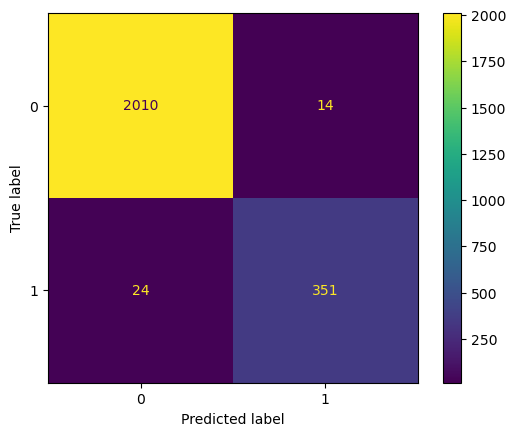

In [222]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels = xgb_cv.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.classes_)
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

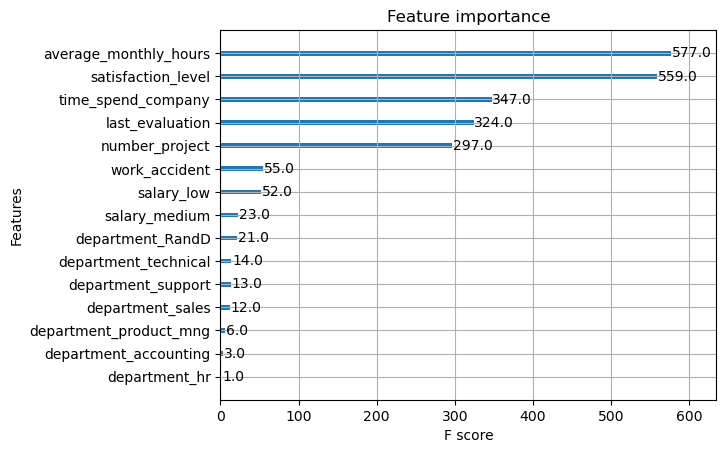

In [220]:
plot_importance(xgb_cv.best_estimator_)

In [1]:
print ('hello world')

hello world


Recall score are incredibly low resulting on low accuracy on predicting whether the person leave or not. How ever it is decent on predicting whether the employee are not gonna leave. since the data are also not balanced. this result can be considered not very good since they fail at predictiing the person that are leaving.  

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.